In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
labels = pd.read_csv('labels.csv', delimiter=';')
labels.head()

,Appsflyer_id,App_id,Publisher (media_source),Site_id,Fraud_reasons
0,740548623,ng.jiji.app,BR,4601,bots
1,151985749,ng.jiji.app,BN,1545,click_spamming
2,70156806,ng.jiji.app,BR,4601,bots
3,270410139,ng.jiji.app,BR,4601,bots
4,123443599,ng.jiji.app,BN,1838,tti_fraud


In [3]:
data = pd.read_csv('data_set .csv')
data = data.merge(labels, how='left', left_on='appsflyer_id', right_on='Appsflyer_id')
data.head()

,site_id,appsflyer_id,publisher,sub_site_id,date,app_id,app_version,attributed_touch_time,attributed_touch_type,operator,...,install_time,language,os_version,sdk_version,wifi,Appsflyer_id,App_id,Publisher (media_source),Site_id,Fraud_reasons
0,0,148552020,AA,0,2017-10-17,id966165025,3006005000,2017-10-17 21:20:31,click,NaN,...,2017-10-17 21:23:30,en-GB,10.3.3,v4.8.0,0,NaN,NaN,NaN,NaN,NaN
1,2588,6912501,AA,1133,2017-10-08,ng.jiji.app,3004002000,2017-10-08 17:46:52,click,MTN NG,...,2017-10-08 17:47:02,English,7.0,v4.8.3,0,NaN,NaN,NaN,NaN,NaN
2,2588,142889582,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 11:00:39,click,MTN - NG,...,2017-10-06 11:00:57,English,5.1,v4.8.3,0,NaN,NaN,NaN,NaN,NaN
3,2588,491337173,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:38:31,click,Airtel,...,2017-10-06 13:38:55,français,4.4.2,v4.8.3,0,NaN,NaN,NaN,NaN,NaN
4,2588,156920862,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:59:55,click,MTN NG,...,2017-10-06 14:29:37,English,6.0,v4.8.3,0,NaN,NaN,NaN,NaN,NaN


In [4]:
labels.shape

(93453, 5)

In [5]:
data = data.drop([ 'Appsflyer_id', 'App_id','Publisher (media_source)','Site_id'],axis=1)
list(data.columns)

['site_id',
 'appsflyer_id',
 'publisher',
 'sub_site_id',
 'date',
 'app_id',
 'app_version',
 'attributed_touch_time',
 'attributed_touch_type',
 'operator',
 'city',
 'country_code',
 'device_type',
 'contributor_1_publisher',
 'contributor_1_touch_time',
 'contributor_2_publisher',
 'contributor_2_touch_time',
 'contributor_3_publisher',
 'contributor_3_touch_time',
 'install_time',
 'language',
 'os_version',
 'sdk_version',
 'wifi',
 'Fraud_reasons']

In [6]:
data.shape

(461500, 25)

In [7]:
trusted = ['AX', 'AG']

In [8]:
data[data['publisher'].isin(trusted)].shape

(1846, 25)

In [9]:
android = 'ng.jiji.ap'
ios = 'id966165025'

47


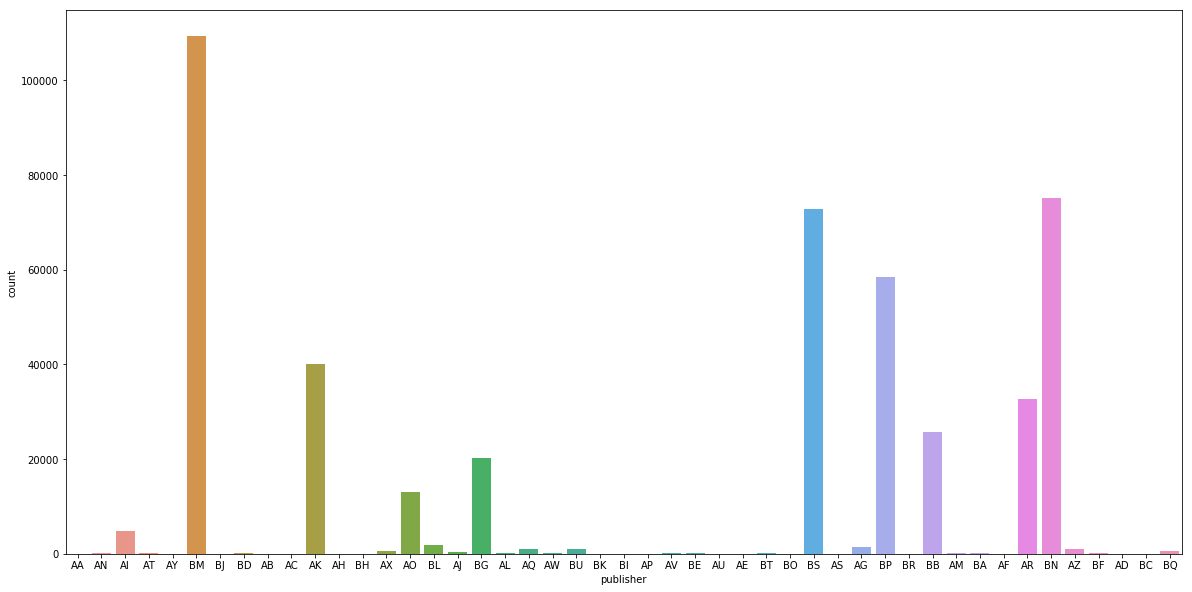

In [10]:
print(data['publisher'].nunique())
plt.figure(num=None, figsize=(20,10))
sns.countplot(data['publisher'])# uncomment to order , order=data.publisher.value_counts().index)

### Analyze whole dataset

157
TOP-10 countries installing application:


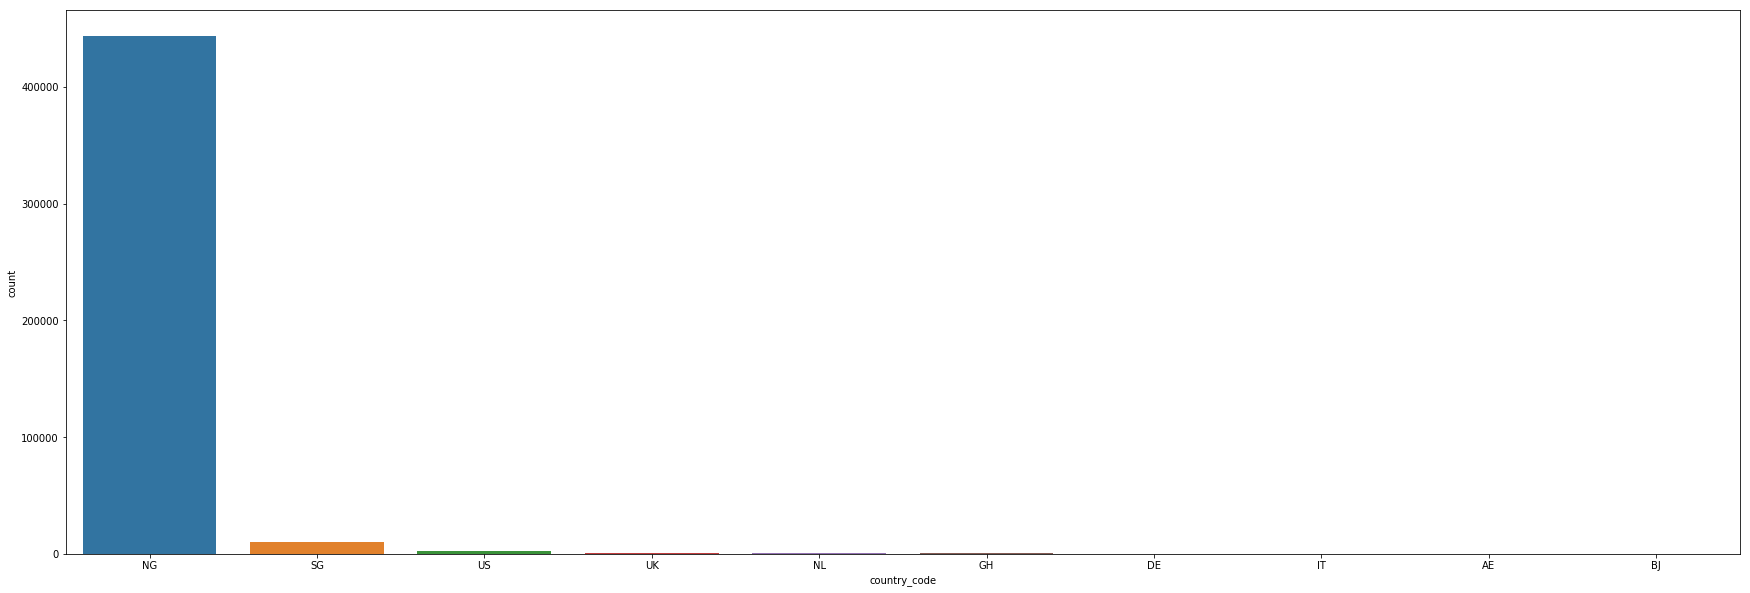

In [12]:
print(data['country_code'].nunique())
print('TOP-10 countries installing application:')
plt.figure(num=None, figsize=(30,10))
sns.countplot(data['country_code'], order=data.country_code.value_counts().iloc[:10].index)

In [13]:
data['install_time'] = pd.to_datetime(data['install_time'])
data['attributed_touch_time'] = pd.to_datetime(data['attributed_touch_time'])
data['tti'] = (data['install_time'] - data['attributed_touch_time']).dt.total_seconds()
data['date'] = pd.to_datetime(data['attributed_touch_time']).dt.date

In [14]:
data = data.sort_values('date')

80


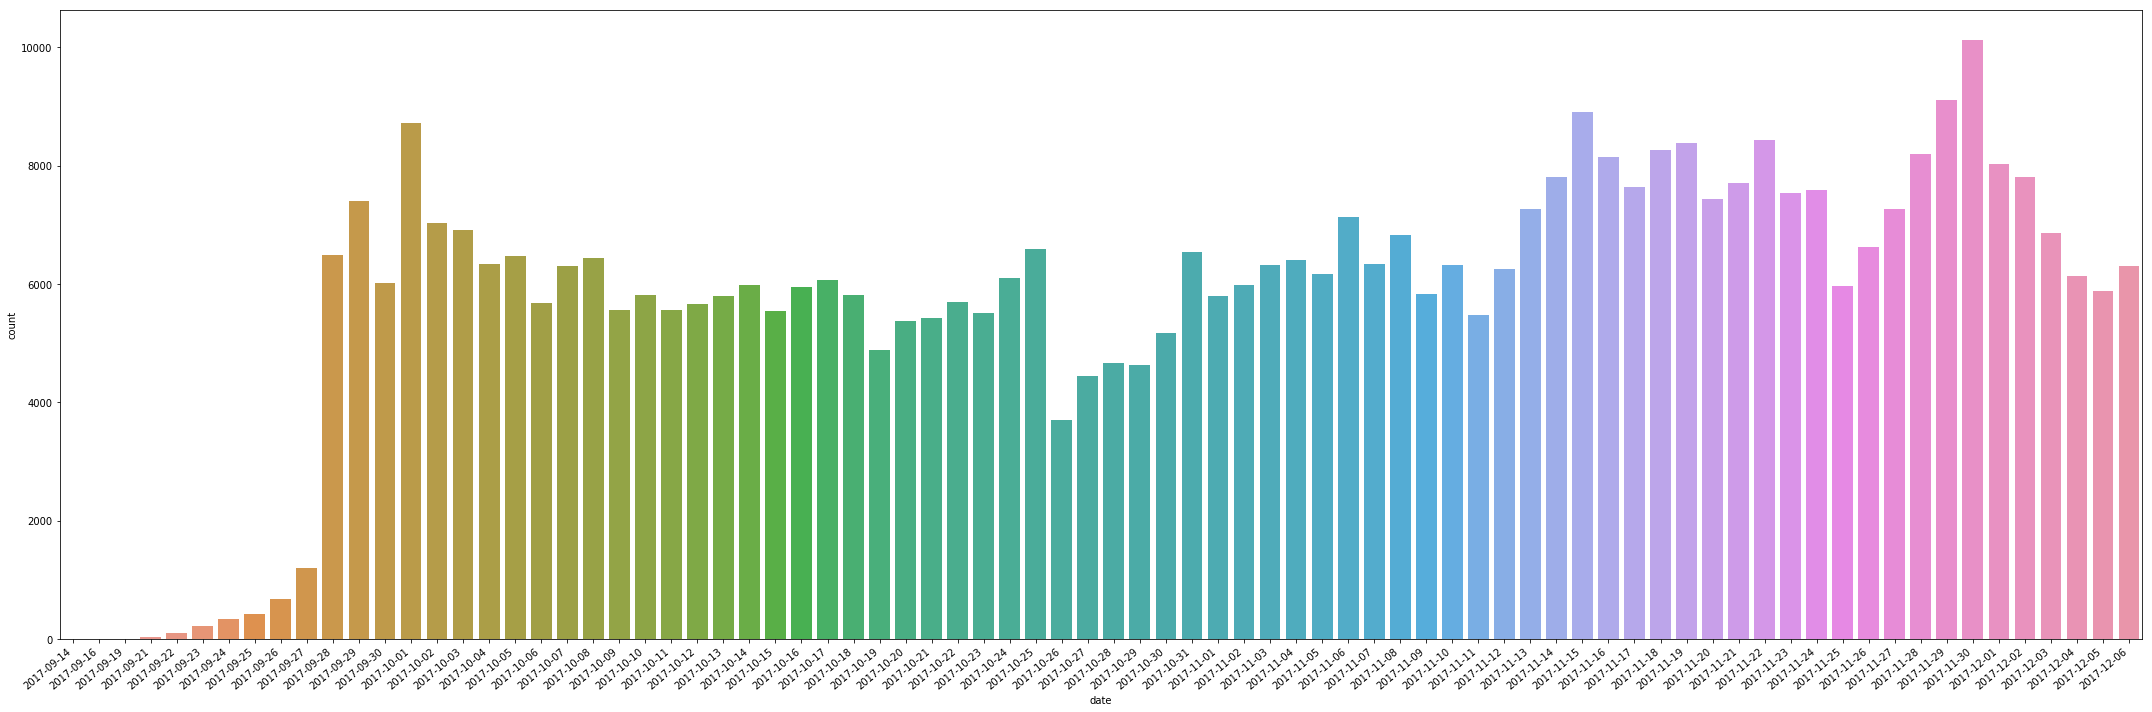

In [15]:
print(data['date'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['date'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

2


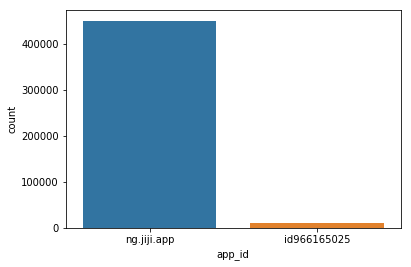

In [16]:
print(data['app_id'].nunique())
plt.figure(num=None)
sns.countplot(data['app_id'])

117


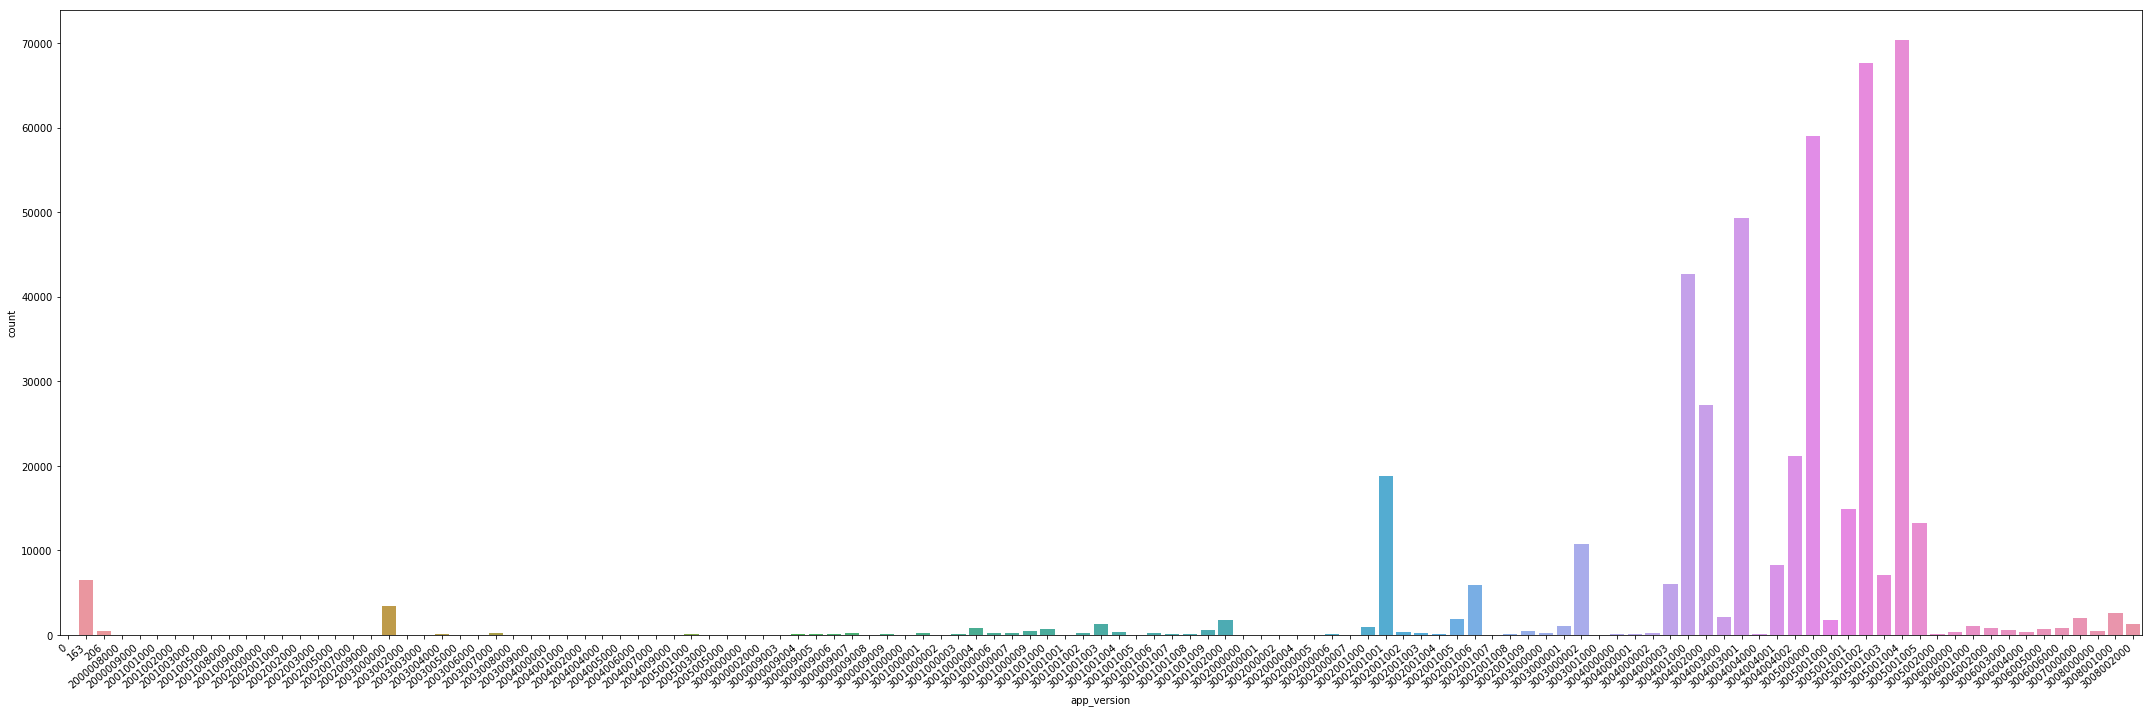

In [17]:
print(data['app_version'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data.sort_values('app_version')['app_version'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

485


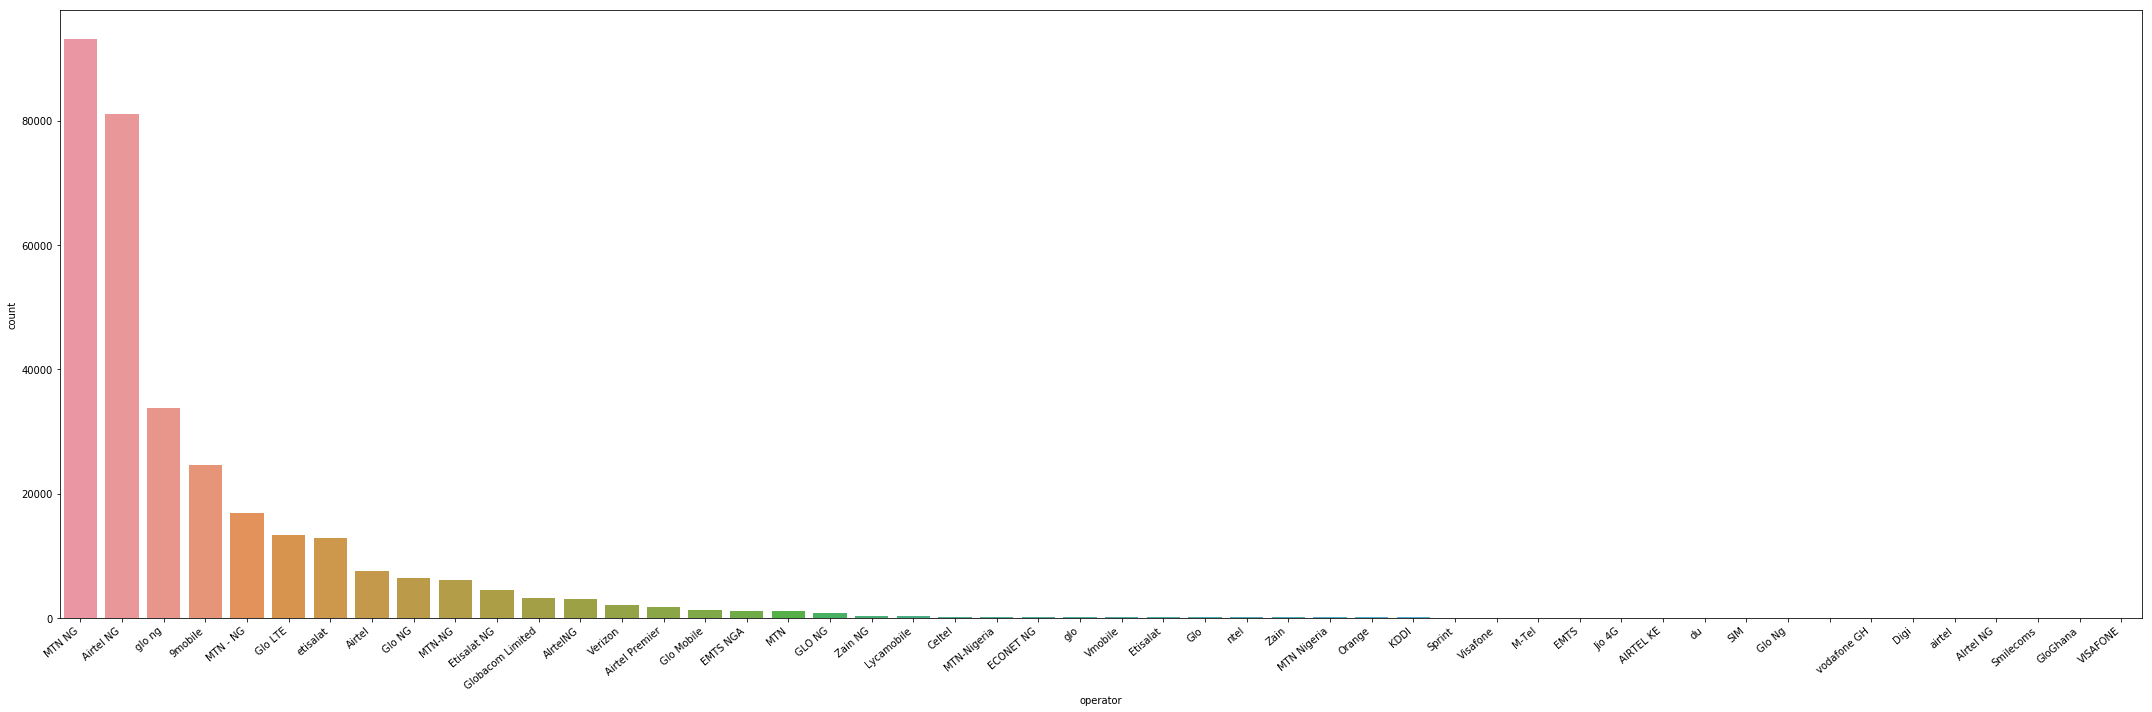

In [18]:
print(data['operator'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['operator'], order=data.operator.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

3659


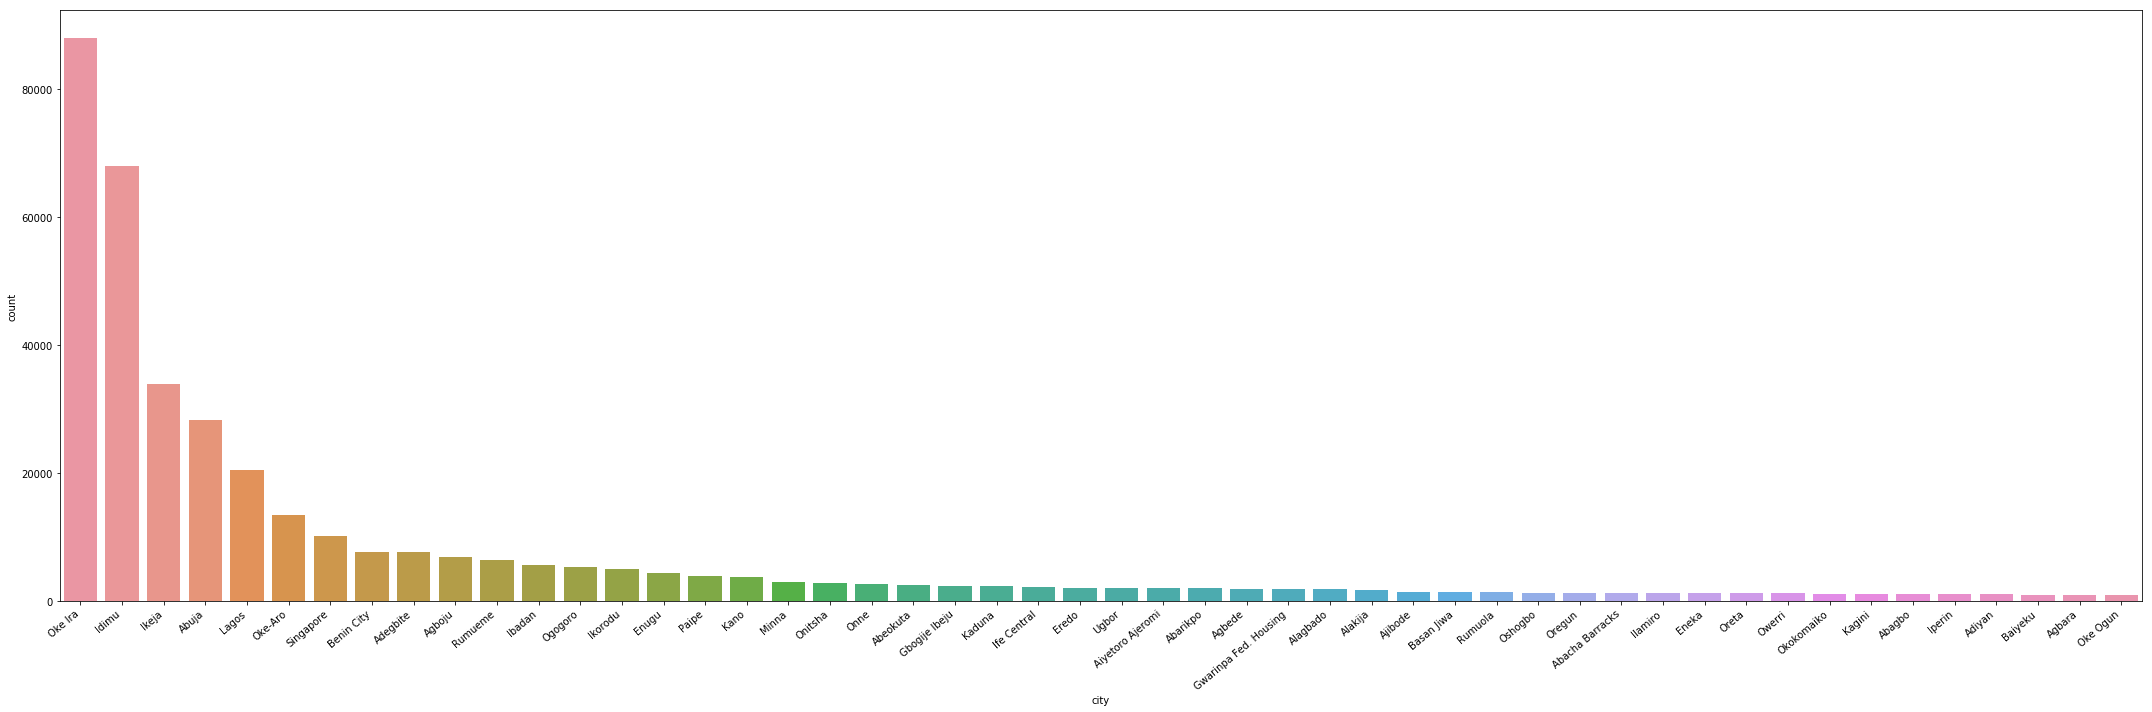

In [19]:
print(data['city'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['city'], order=data.city.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

157


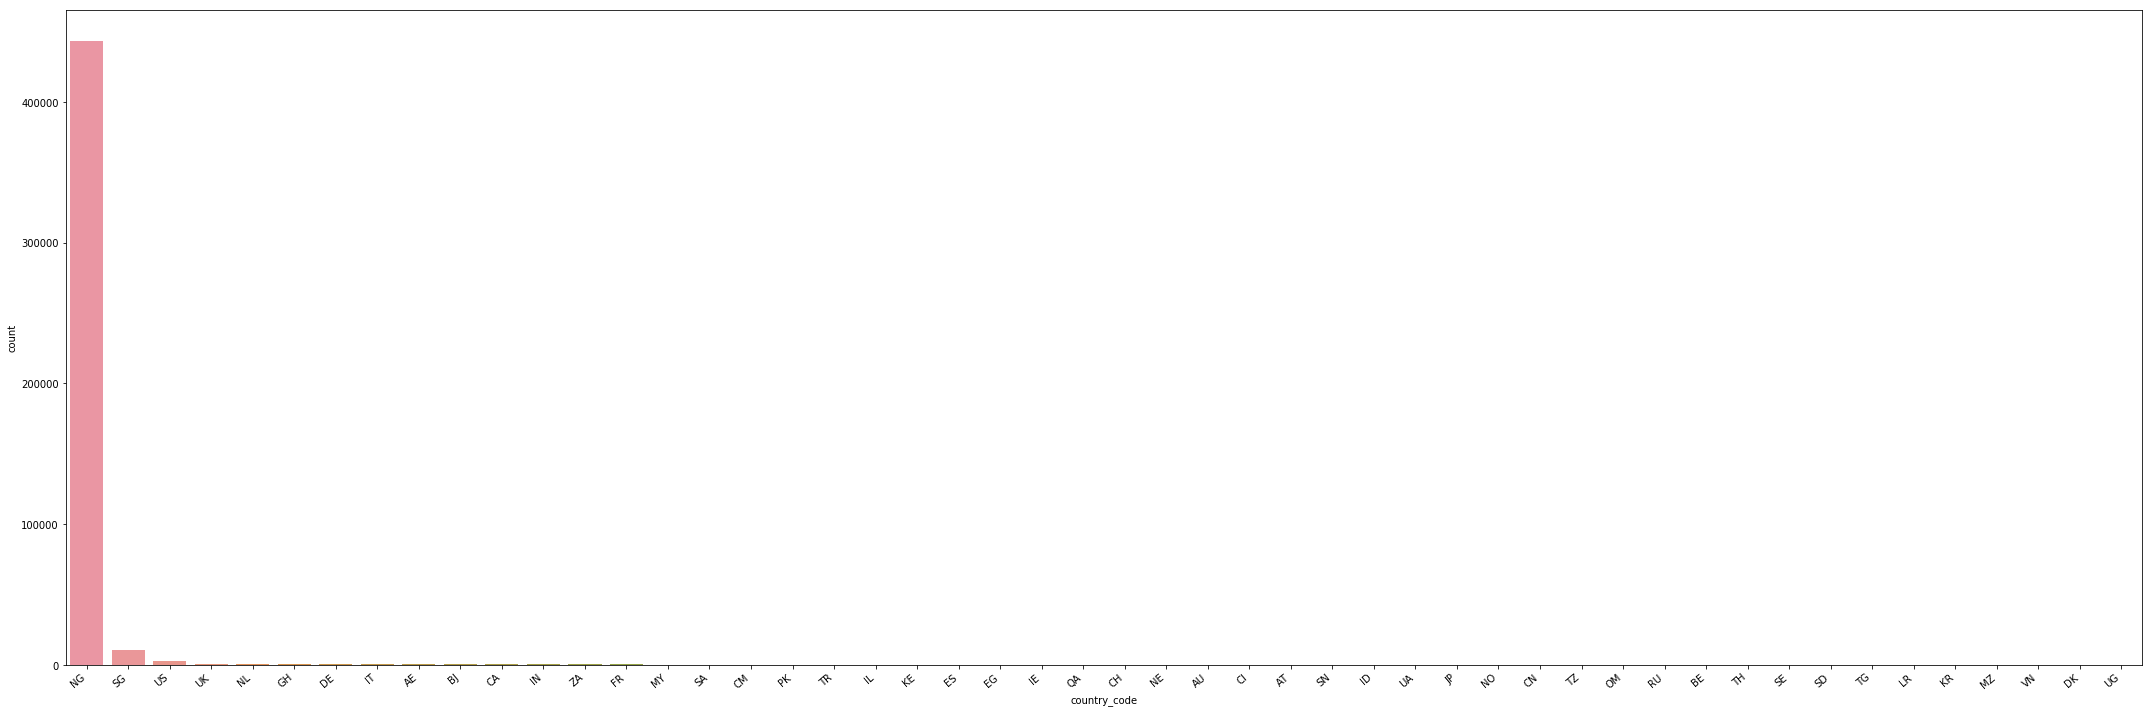

In [21]:
print(data['country_code'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['country_code'], order=data.country_code.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

9794


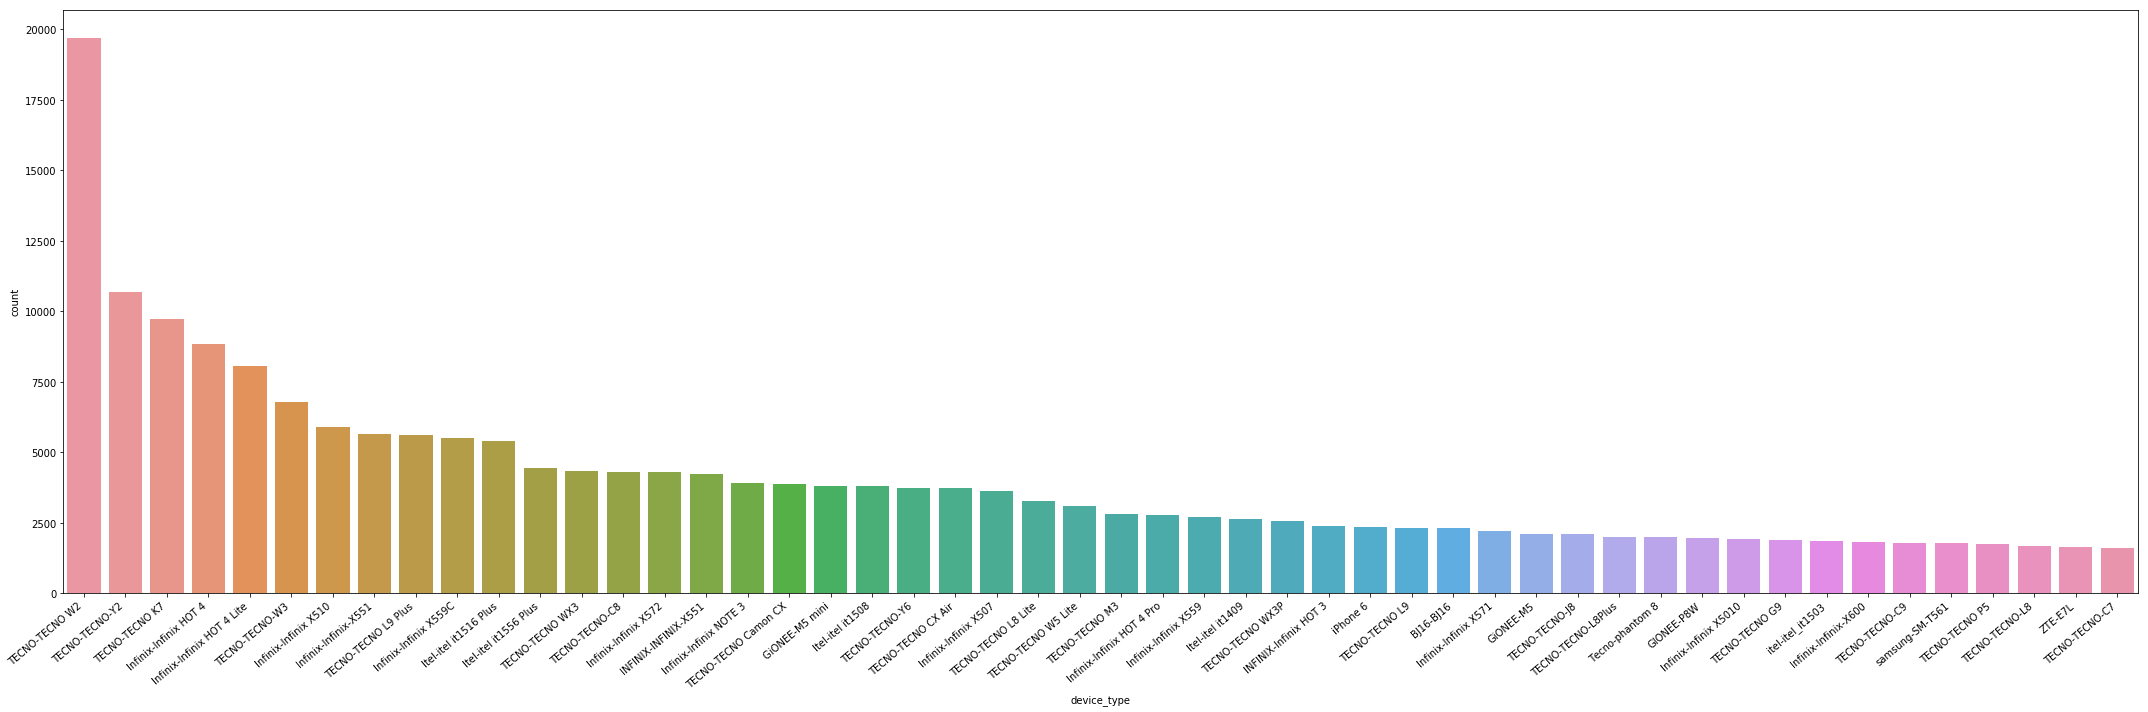

In [23]:
print(data['device_type'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['device_type'], order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

267


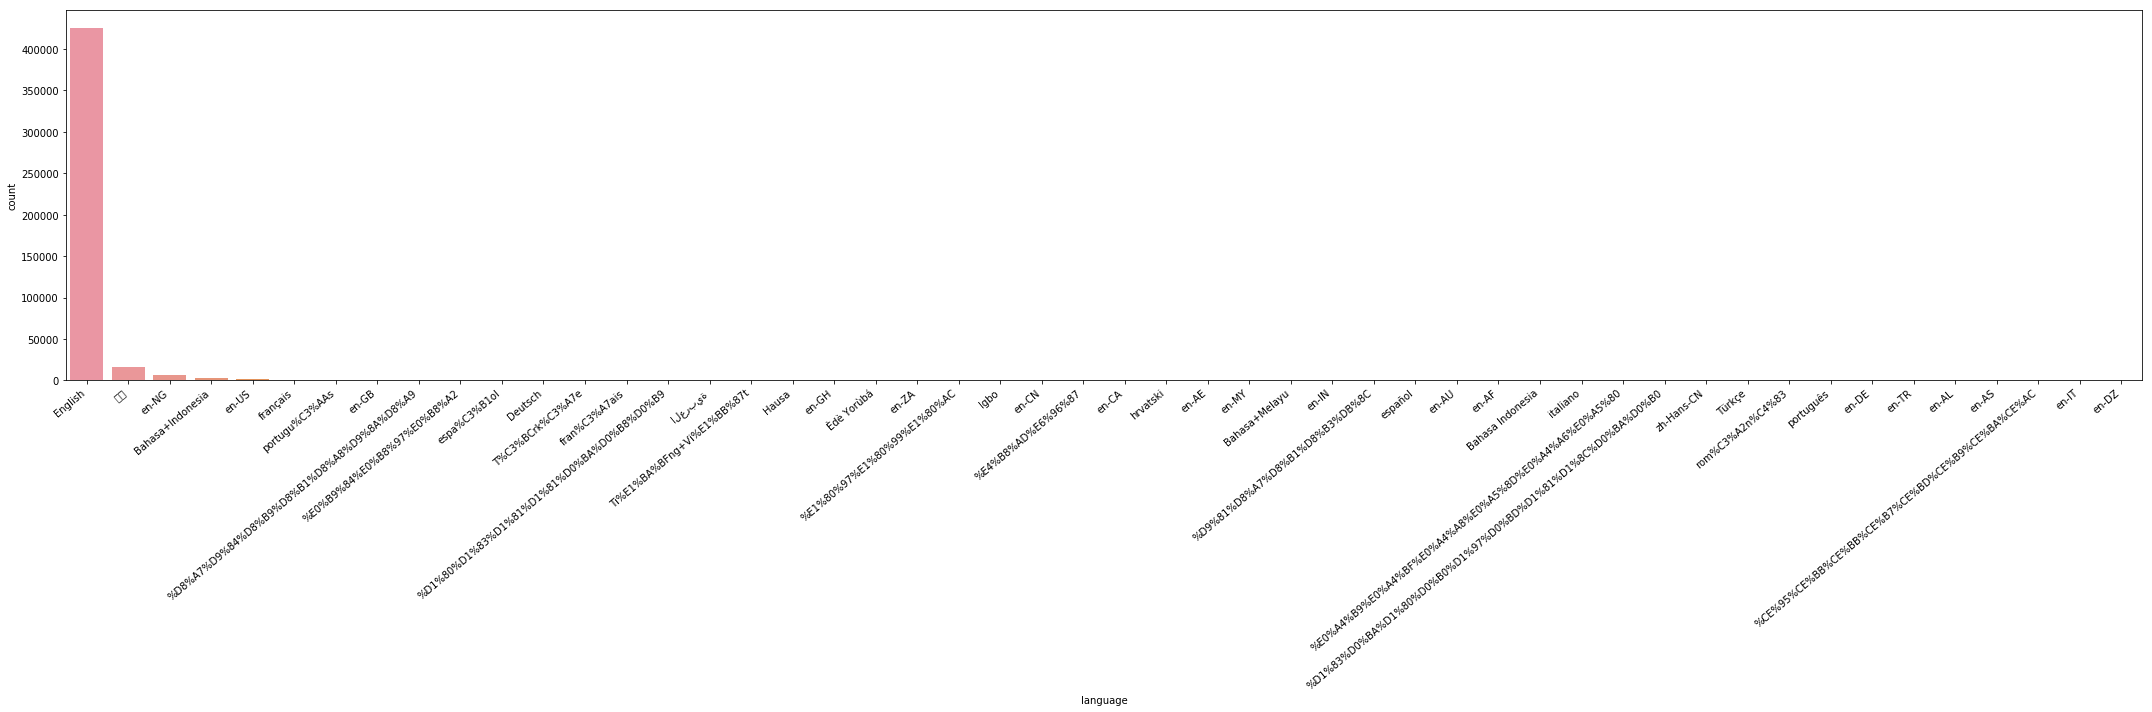

In [26]:
print(data['language'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['language'], order=data.language.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

117


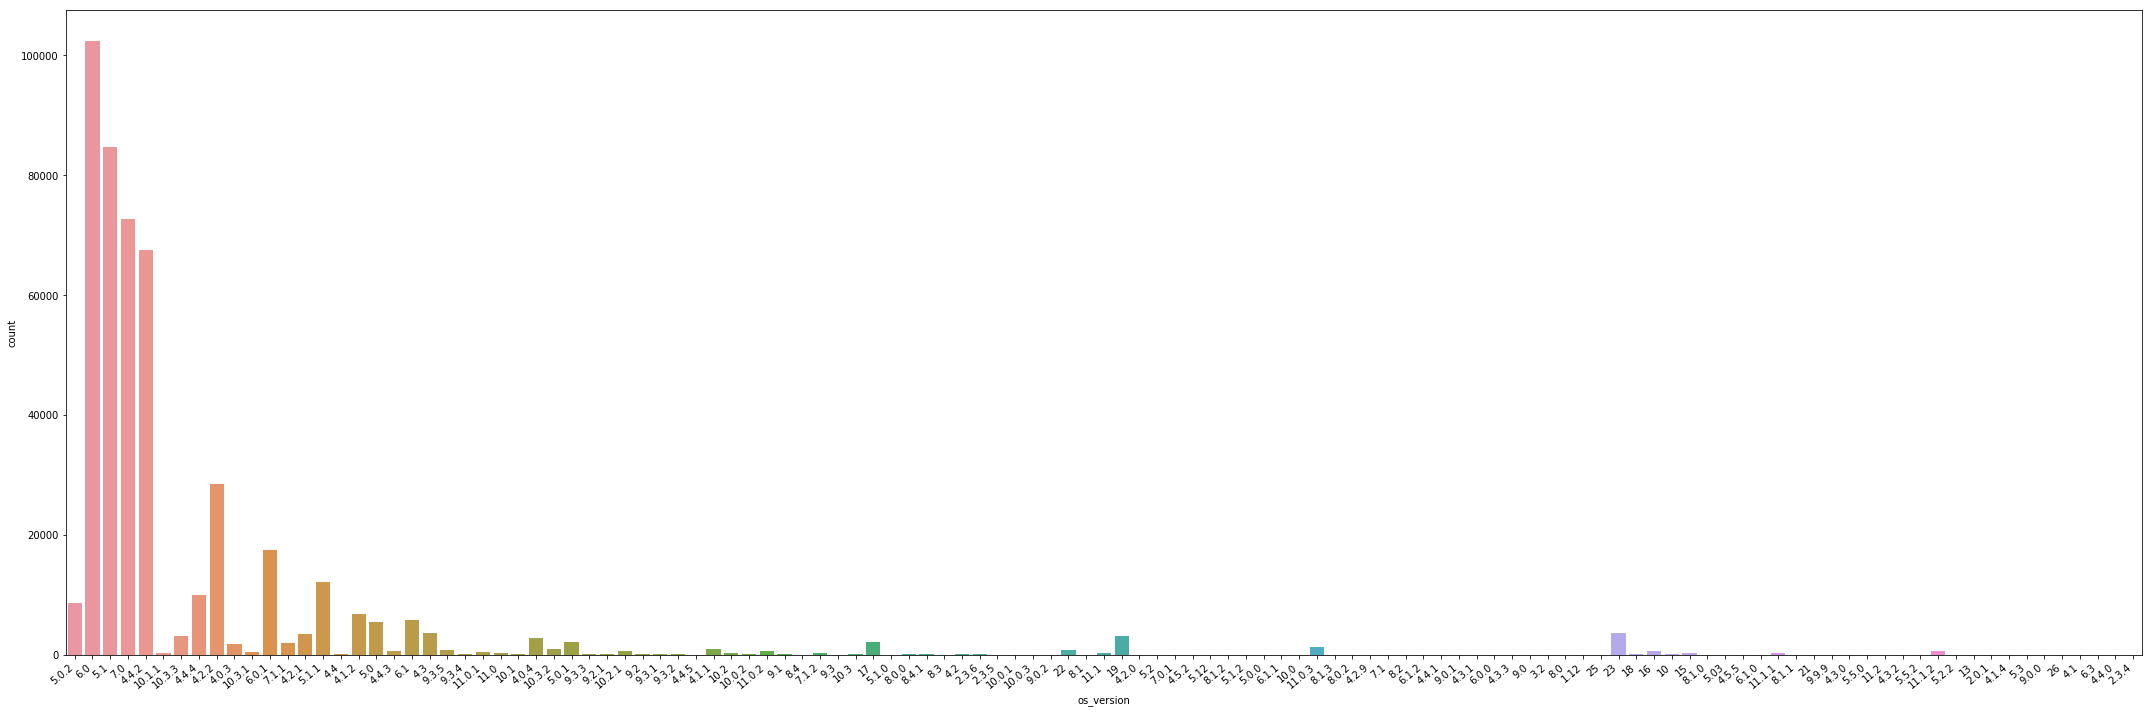

In [27]:
print(data['os_version'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['os_version'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

19


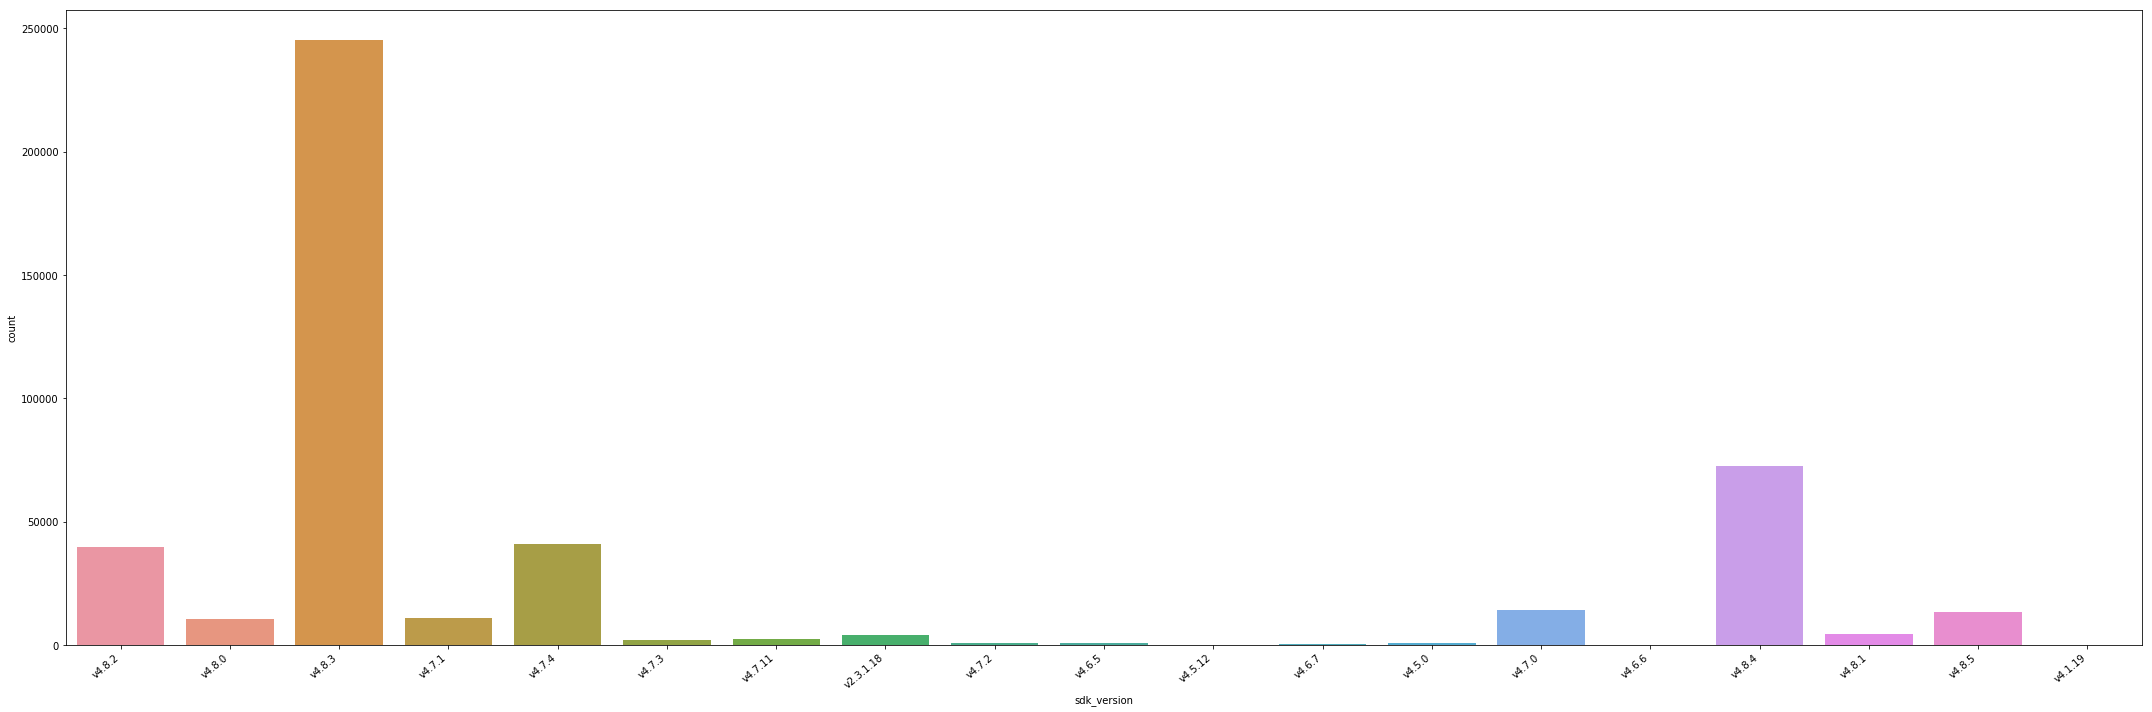

In [28]:
print(data['sdk_version'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(data['sdk_version'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

2


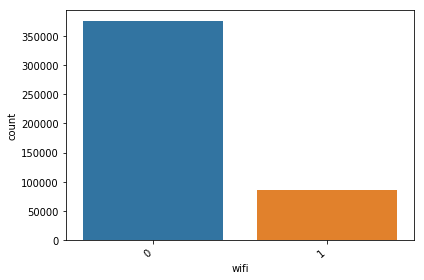

In [30]:
print(data['wifi'].nunique())
plt.figure(num=None)#, figsize=(30,10))
ax = sns.countplot(data['wifi'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Analyze only trusted publishers: AX, AG

In [32]:
axag = data[data['publisher'].isin(trusted)]
axag.head()

,site_id,appsflyer_id,publisher,sub_site_id,date,app_id,app_version,attributed_touch_time,attributed_touch_type,operator,...,contributor_2_touch_time,contributor_3_publisher,contributor_3_touch_time,install_time,language,os_version,sdk_version,wifi,Fraud_reasons,tti
266304,2002,492858140,AG,1377,2017-09-22,ng.jiji.app,3003000002,2017-09-22 05:57:25,click,NaN,...,0000-00-00 00:00:00,AG,0000-00-00 00:00:00,2017-09-28 23:54:49,English,4.4.2,v4.7.4,0,NaN,583044.0
154740,0,804233413,AX,0,2017-09-23,ng.jiji.app,3004001000,2017-09-23 20:34:25,click,Glo LTE,...,0000-00-00 00:00:00,AX,0000-00-00 00:00:00,2017-09-30 09:41:39,English,7.0,v4.8.2,0,NaN,565634.0
154748,0,676031915,AX,0,2017-09-23,ng.jiji.app,3004001000,2017-09-23 15:04:26,click,etisalat,...,0000-00-00 00:00:00,AX,0000-00-00 00:00:00,2017-09-30 10:29:19,English,7.0,v4.8.2,0,NaN,588293.0
154893,4332,708928728,AX,0,2017-09-24,ng.jiji.app,3004001000,2017-09-24 05:10:41,click,MTN NG,...,0000-00-00 00:00:00,AX,0000-00-00 00:00:00,2017-09-30 16:12:04,English,7.0,v4.8.2,0,NaN,558083.0
266292,2002,266448110,AG,1377,2017-09-24,ng.jiji.app,3004001000,2017-09-24 15:04:17,click,MTN NG,...,0000-00-00 00:00:00,AG,0000-00-00 00:00:00,2017-09-30 18:34:11,English,5.1,v4.8.2,1,NaN,530994.0


In [33]:
axag.shape

(1846, 26)

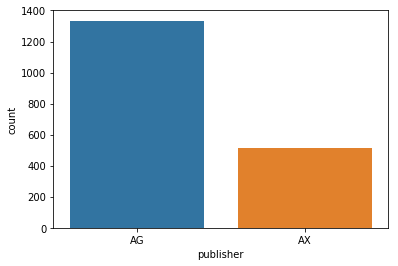

In [34]:
sns.countplot(axag['publisher'])

14
TOP-10 countries installing application:


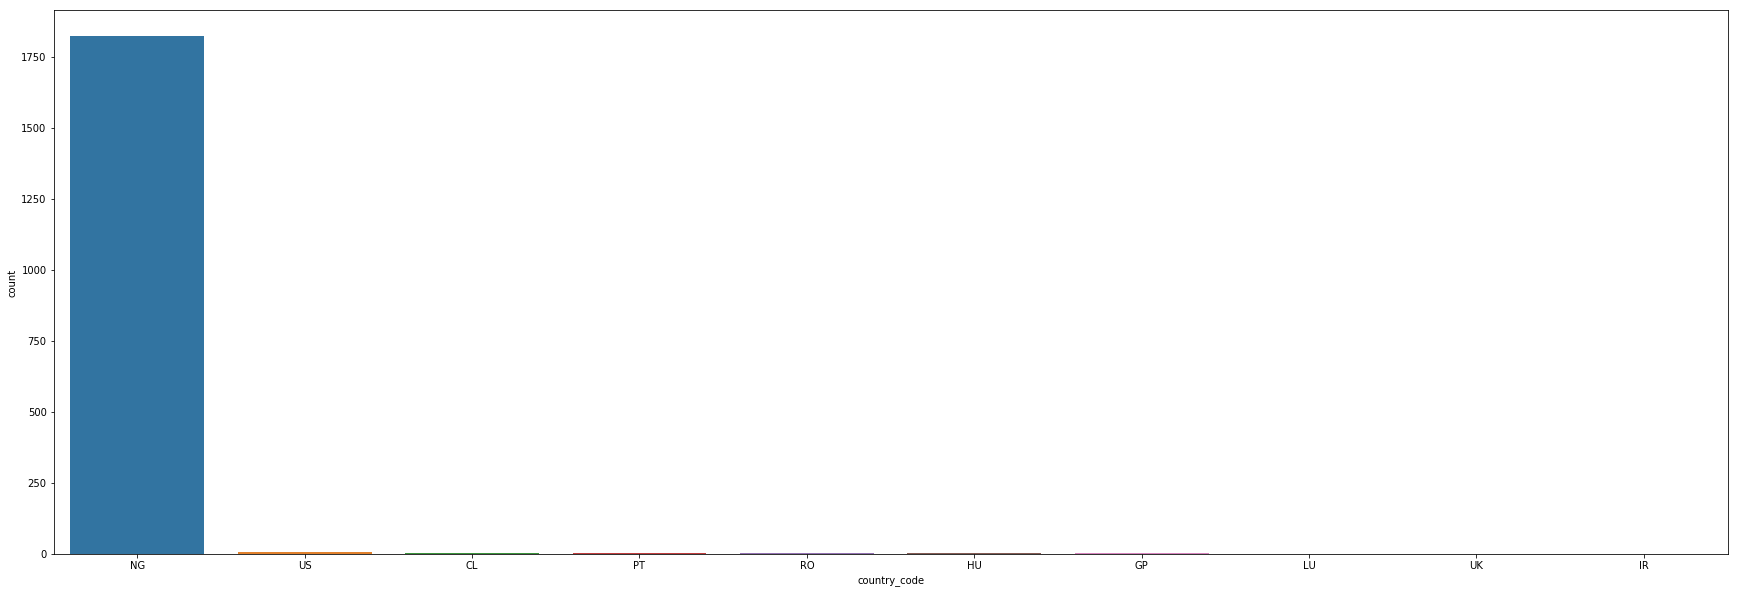

In [35]:
print(axag['country_code'].nunique())
print('TOP-10 countries installing application:')
plt.figure(num=None, figsize=(30,10))
sns.countplot(axag['country_code'], order=axag.country_code.value_counts().iloc[:10].index)

As we can see, most of the installs are NG, second place is US, not SG, second place is less in percents than before

In [36]:
axag = axag.sort_values('date')

20


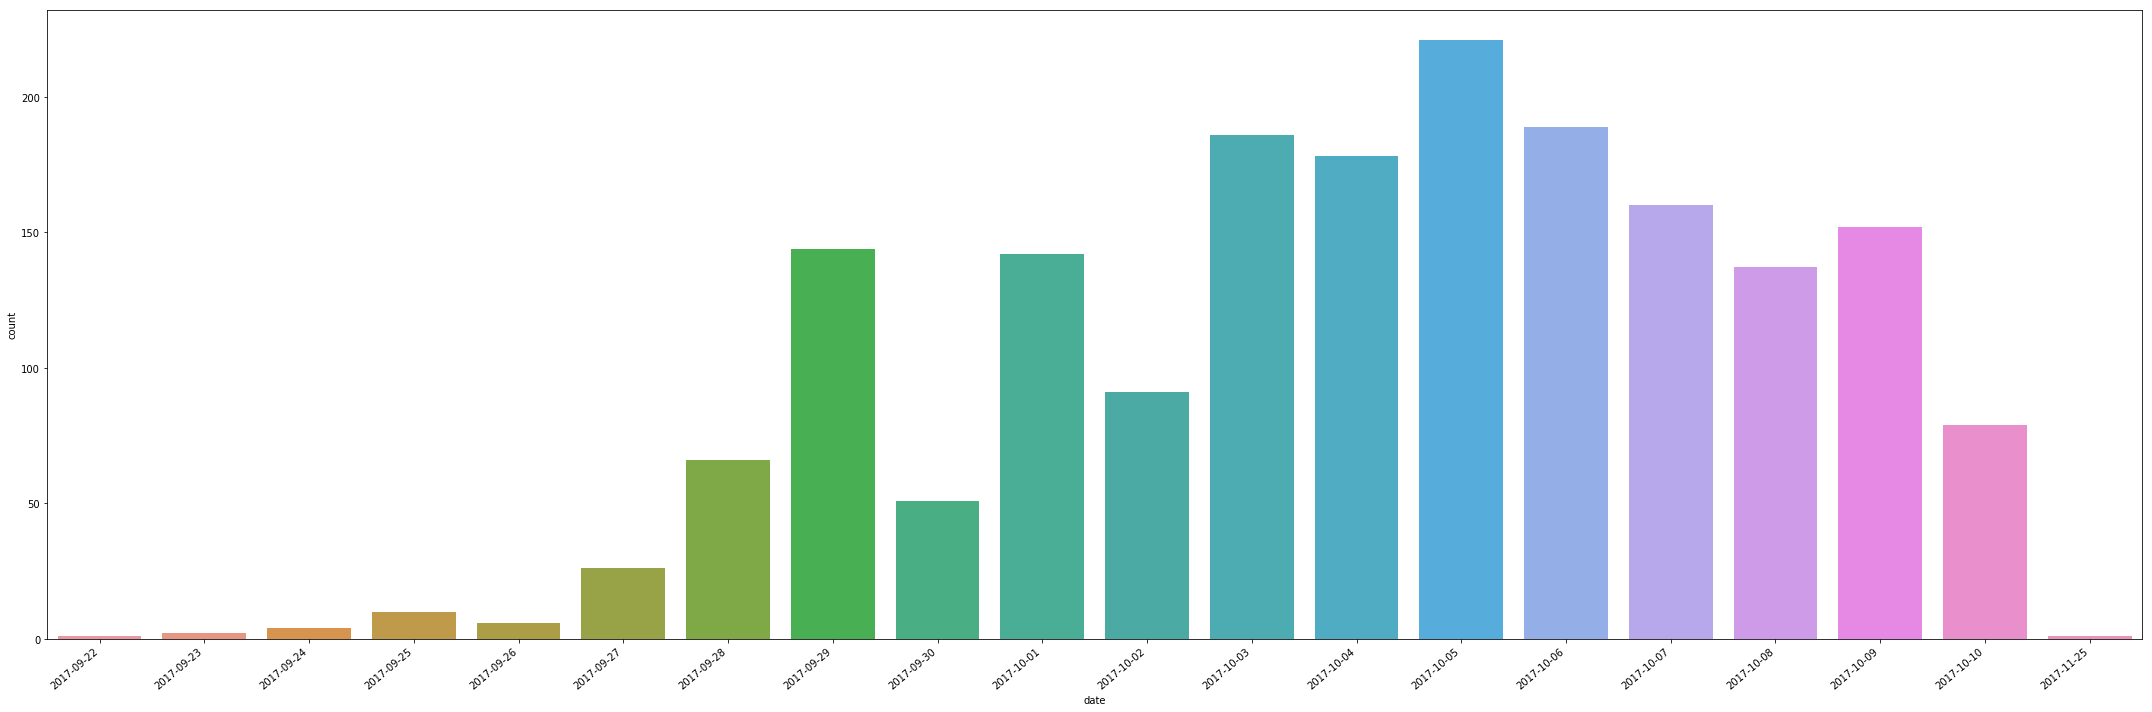

In [37]:
print(axag['date'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['date'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

2


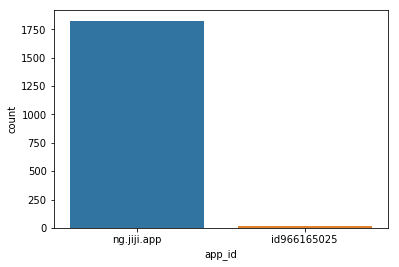

In [38]:
print(axag['app_id'].nunique())
plt.figure(num=None)
sns.countplot(axag['app_id'])

48


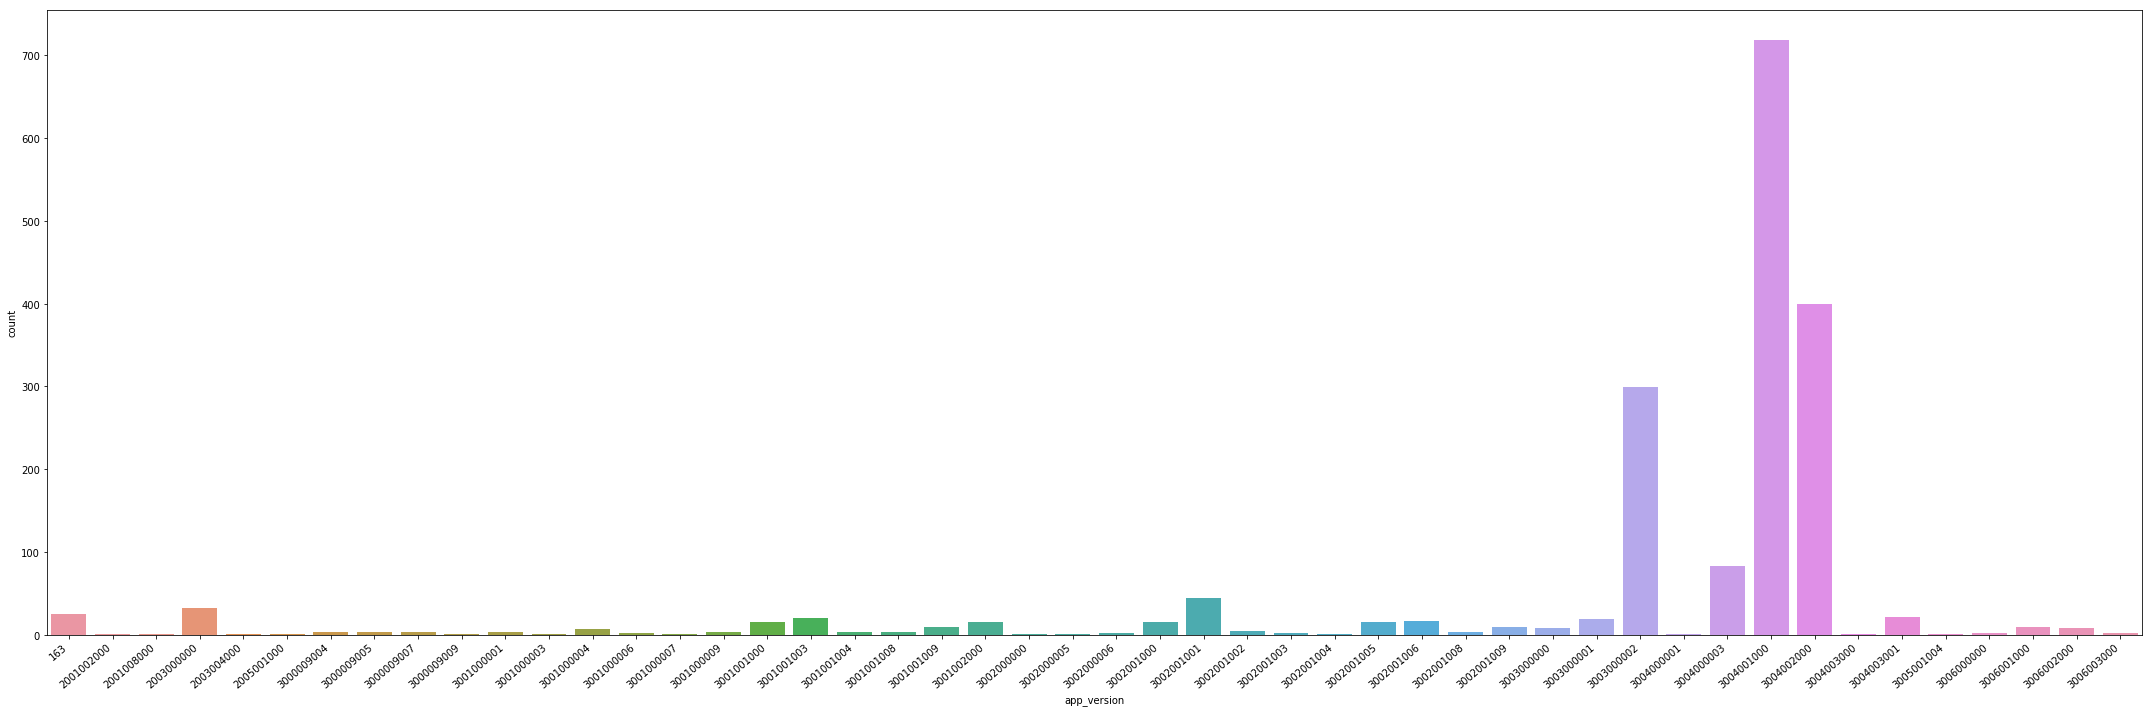

In [39]:
print(axag['app_version'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag.sort_values('app_version')['app_version'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

46


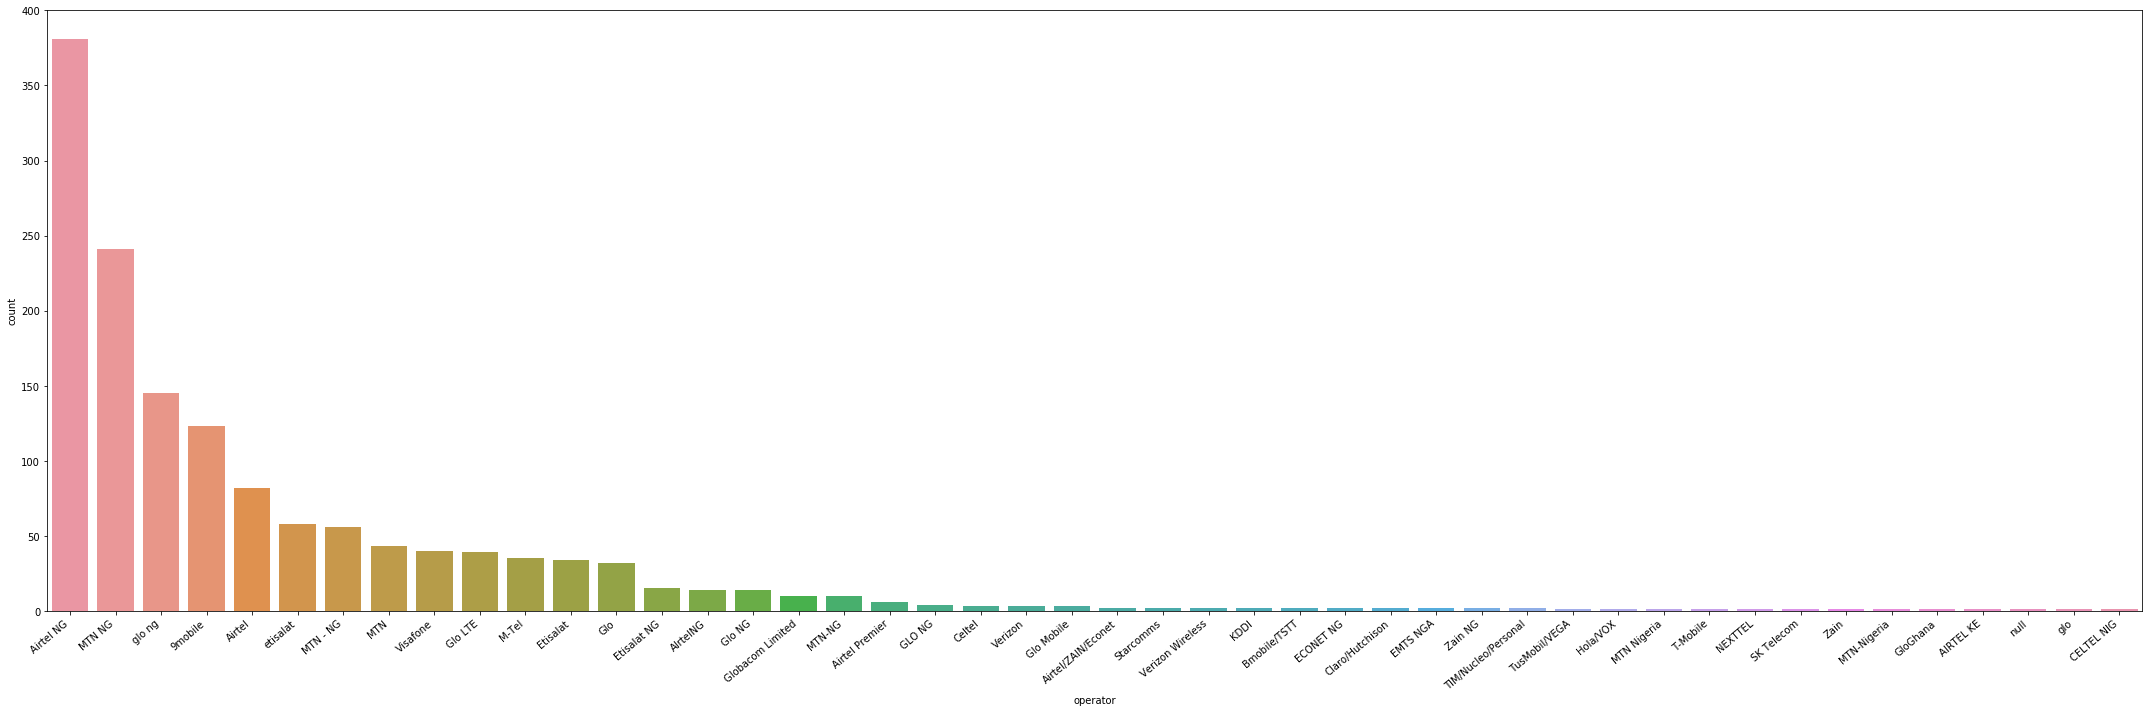

In [40]:
print(axag['operator'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['operator'], order=axag.operator.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

188


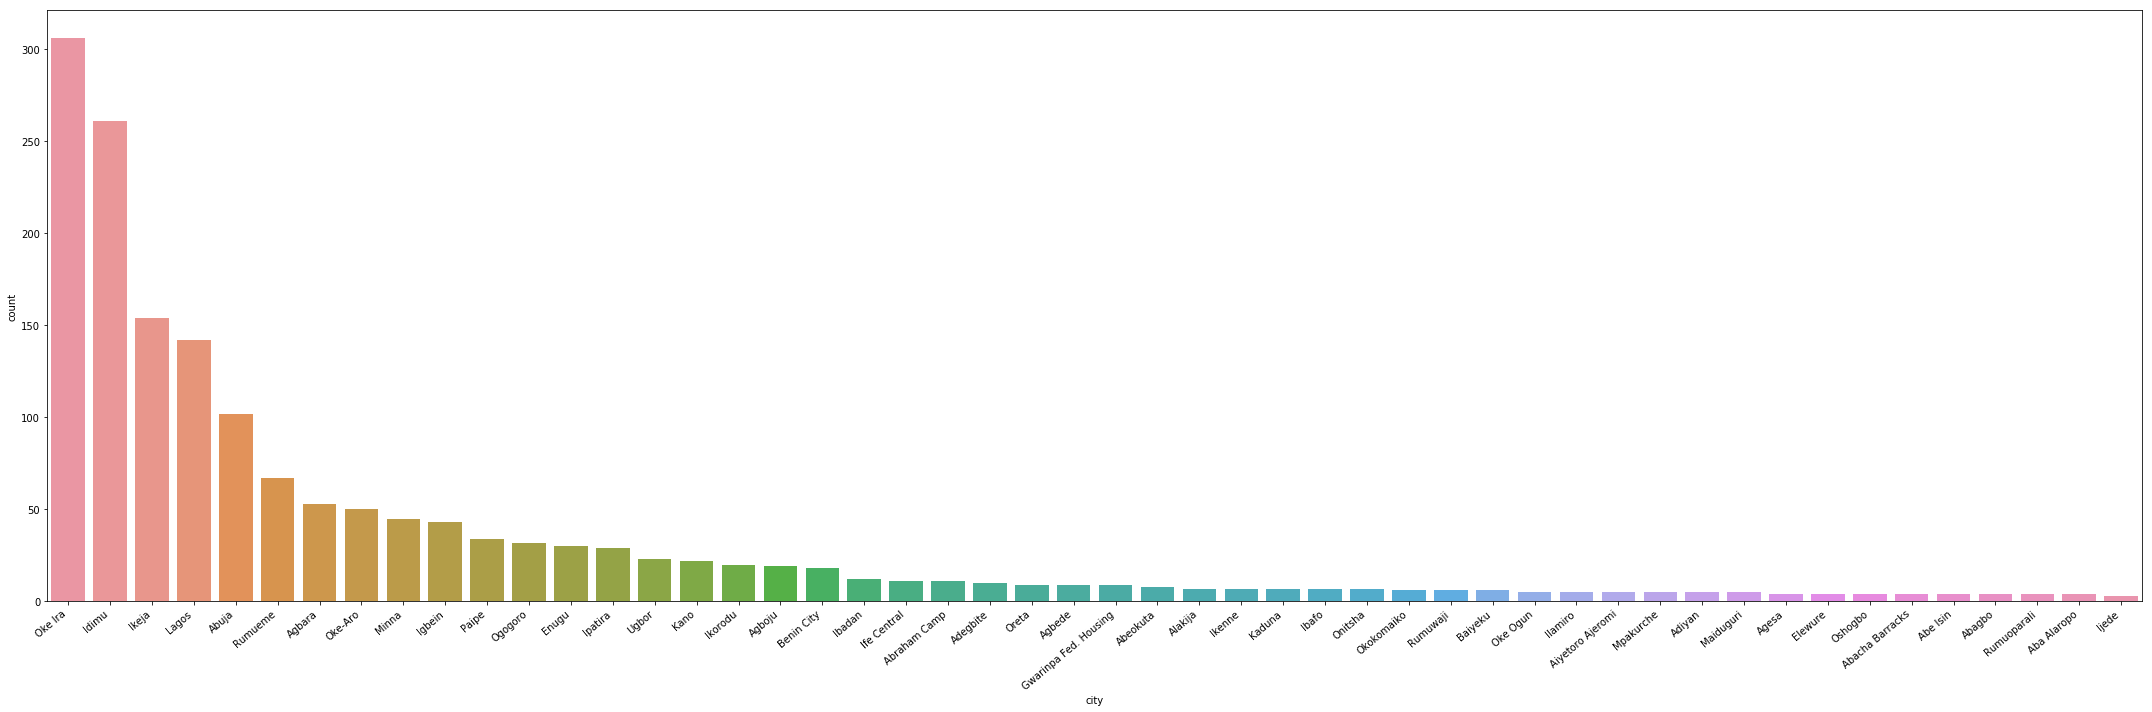

In [41]:
print(axag['city'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['city'], order=axag.city.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

14


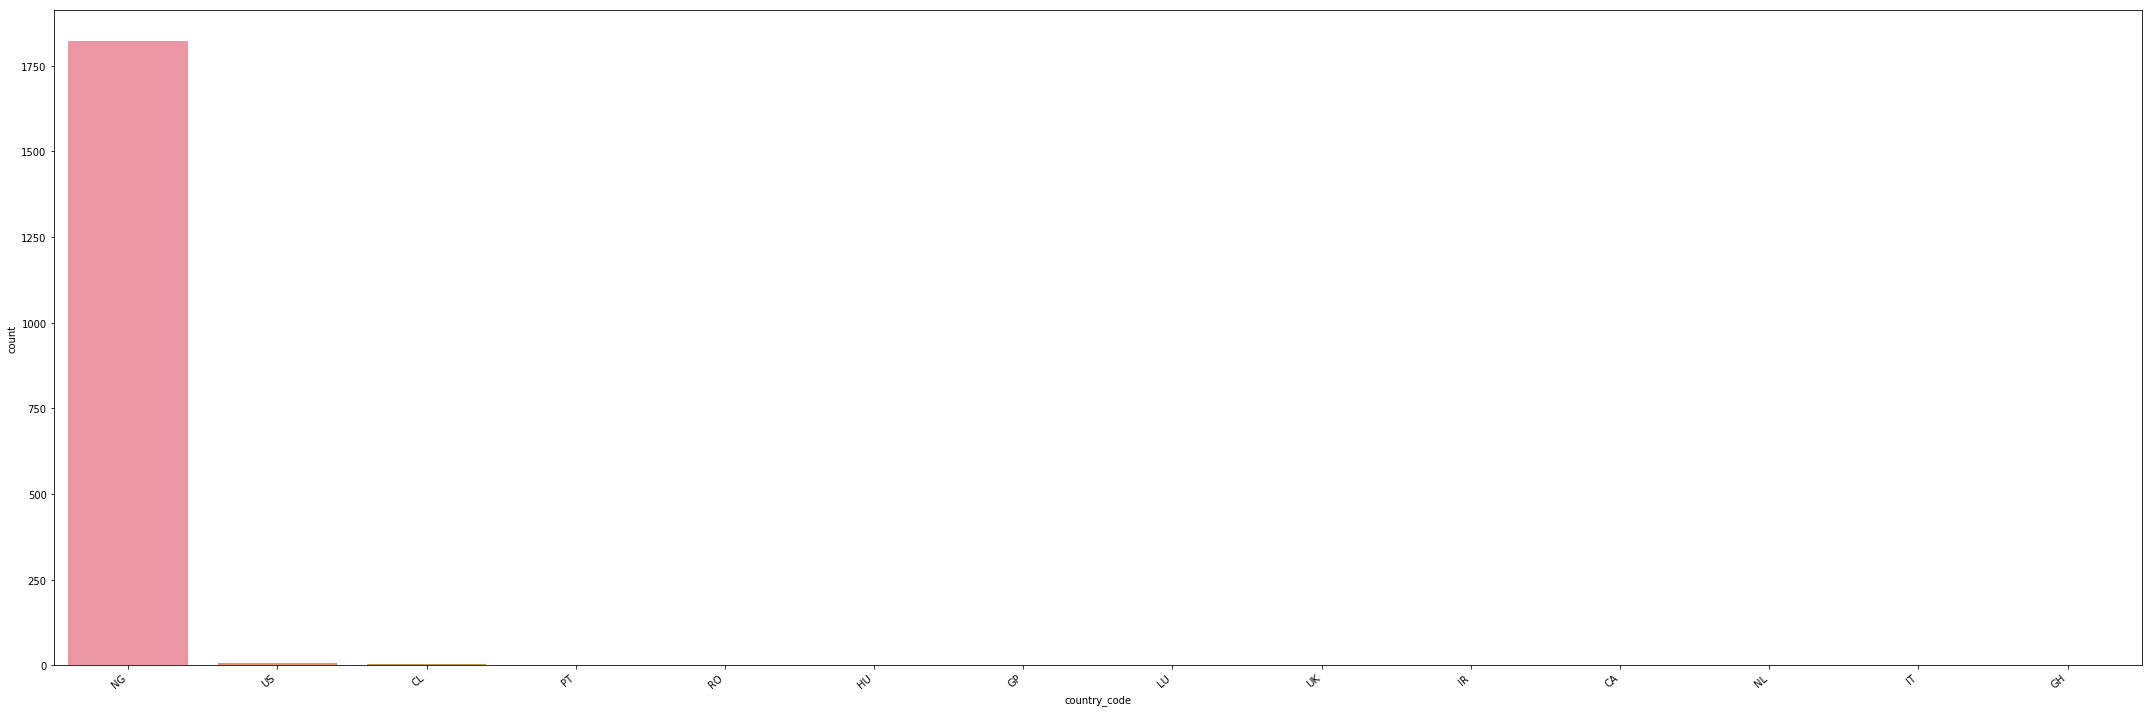

In [42]:
print(axag['country_code'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['country_code'], order=axag.country_code.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

665


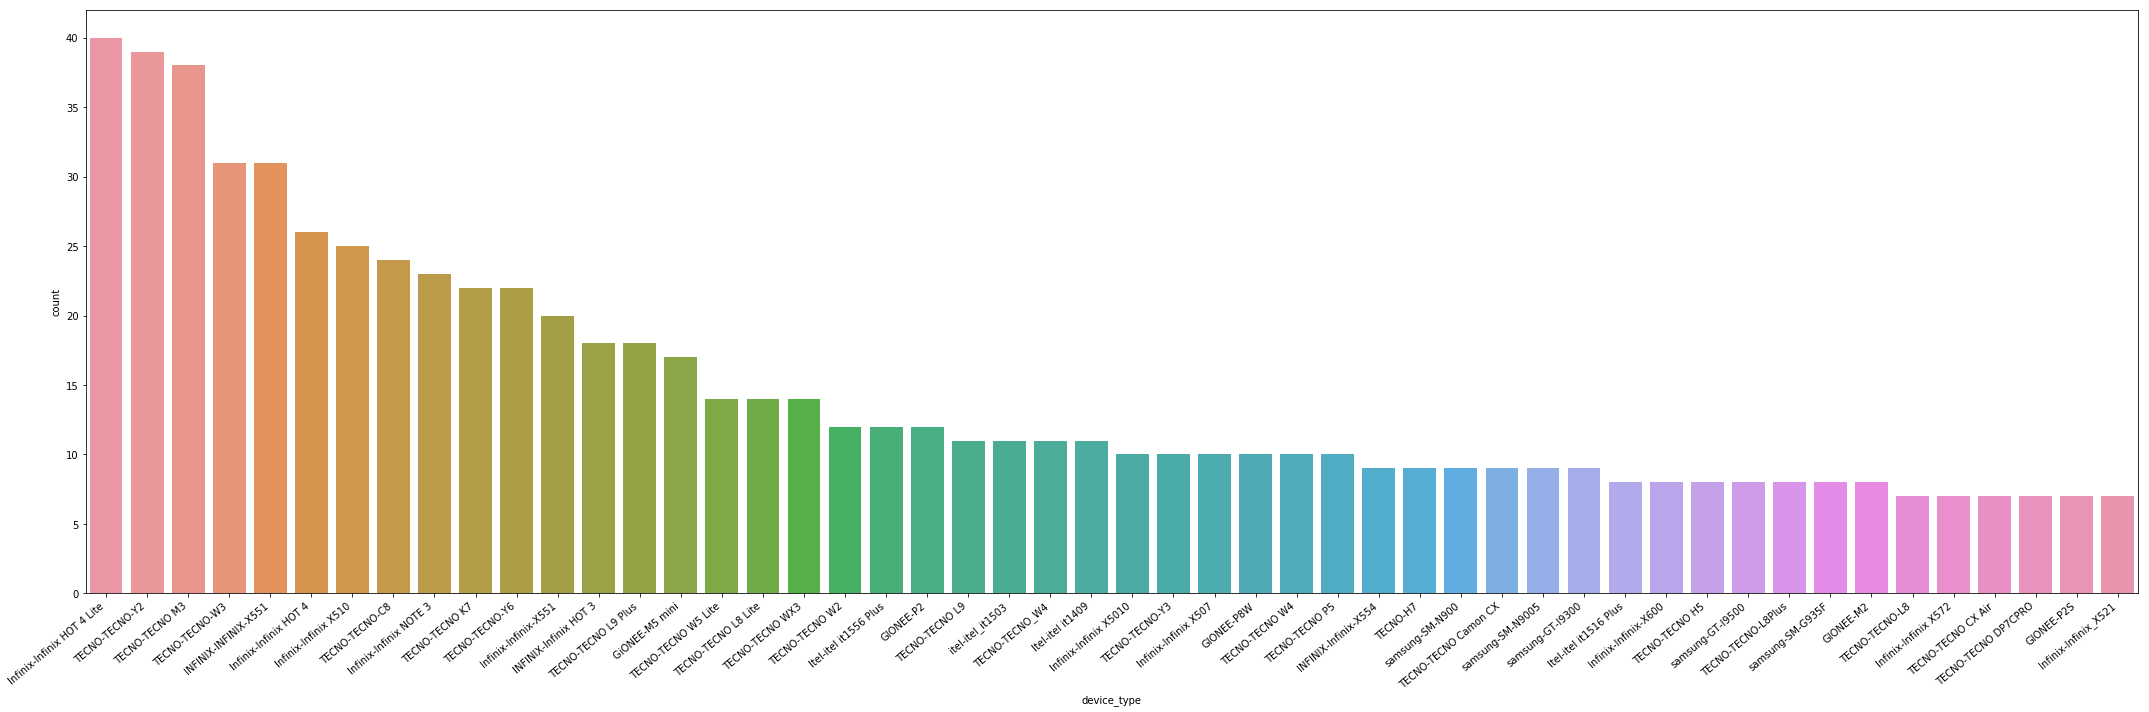

In [43]:
print(axag['device_type'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['device_type'], order=axag.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

11


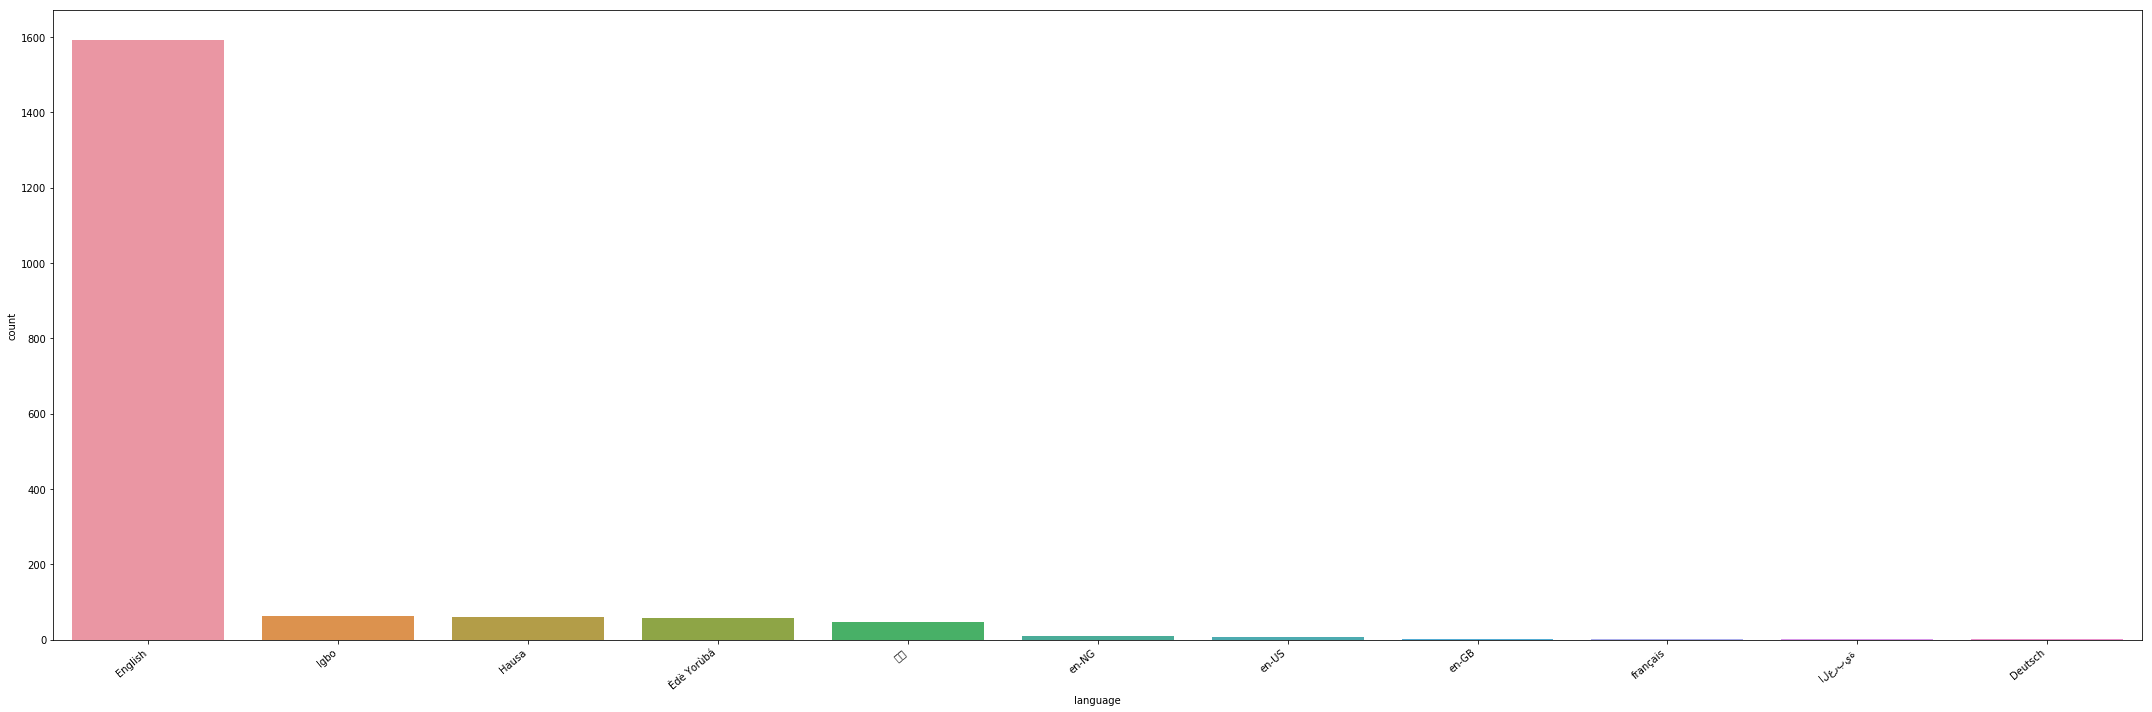

In [45]:
print(axag['language'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['language'], order=axag.language.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

32


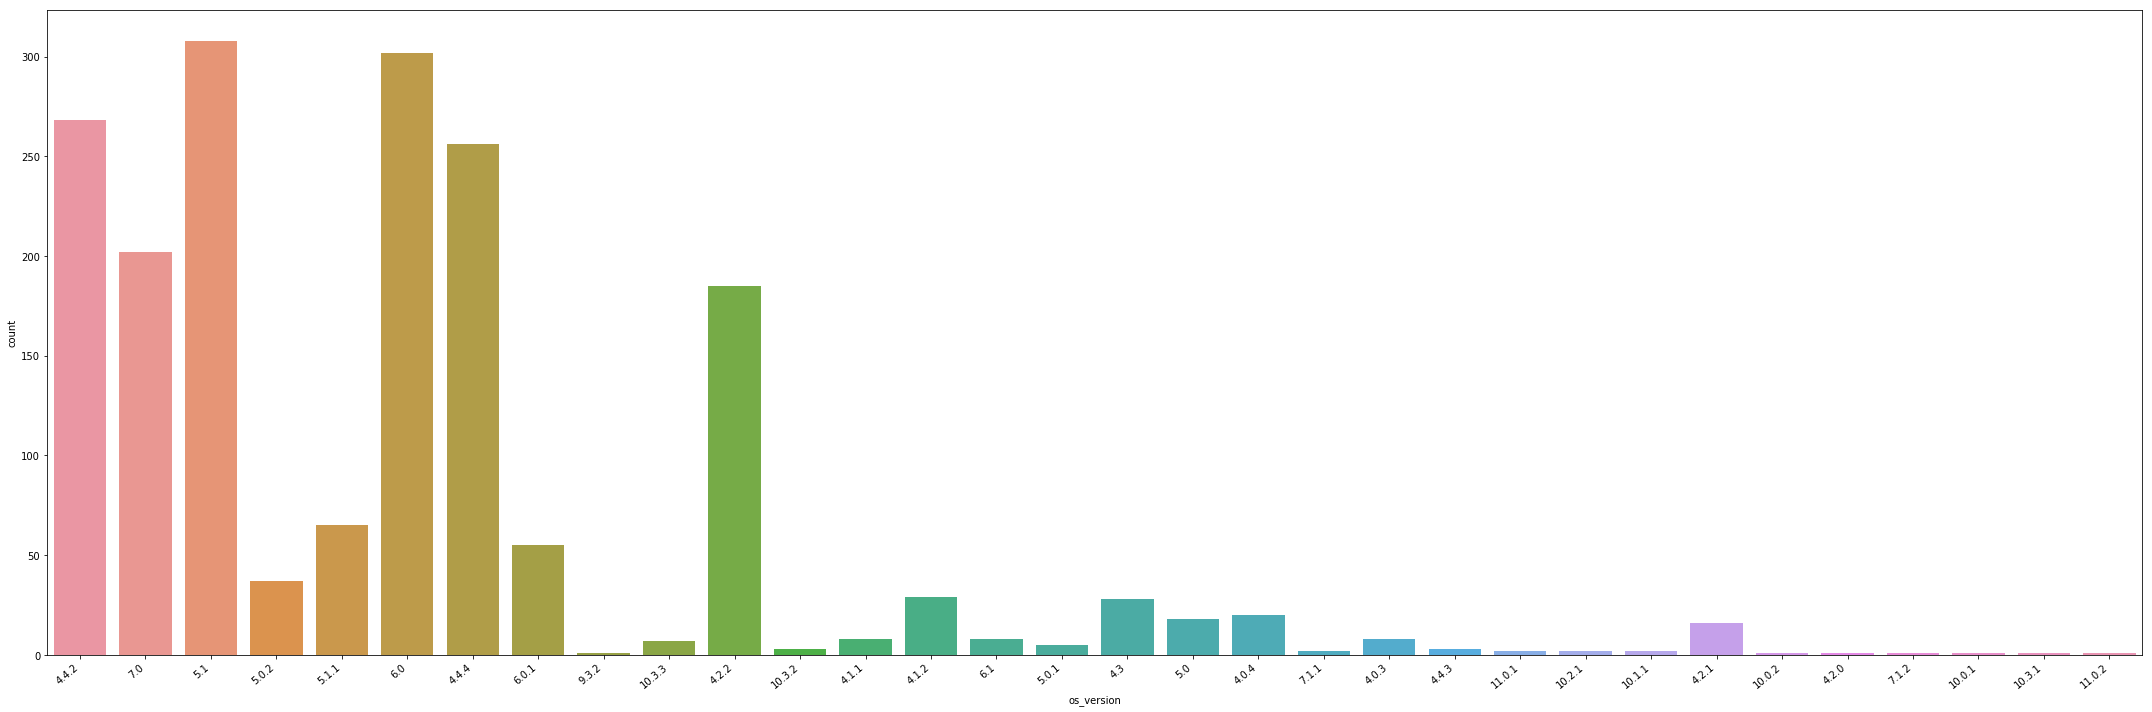

In [46]:
print(axag['os_version'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['os_version'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

14


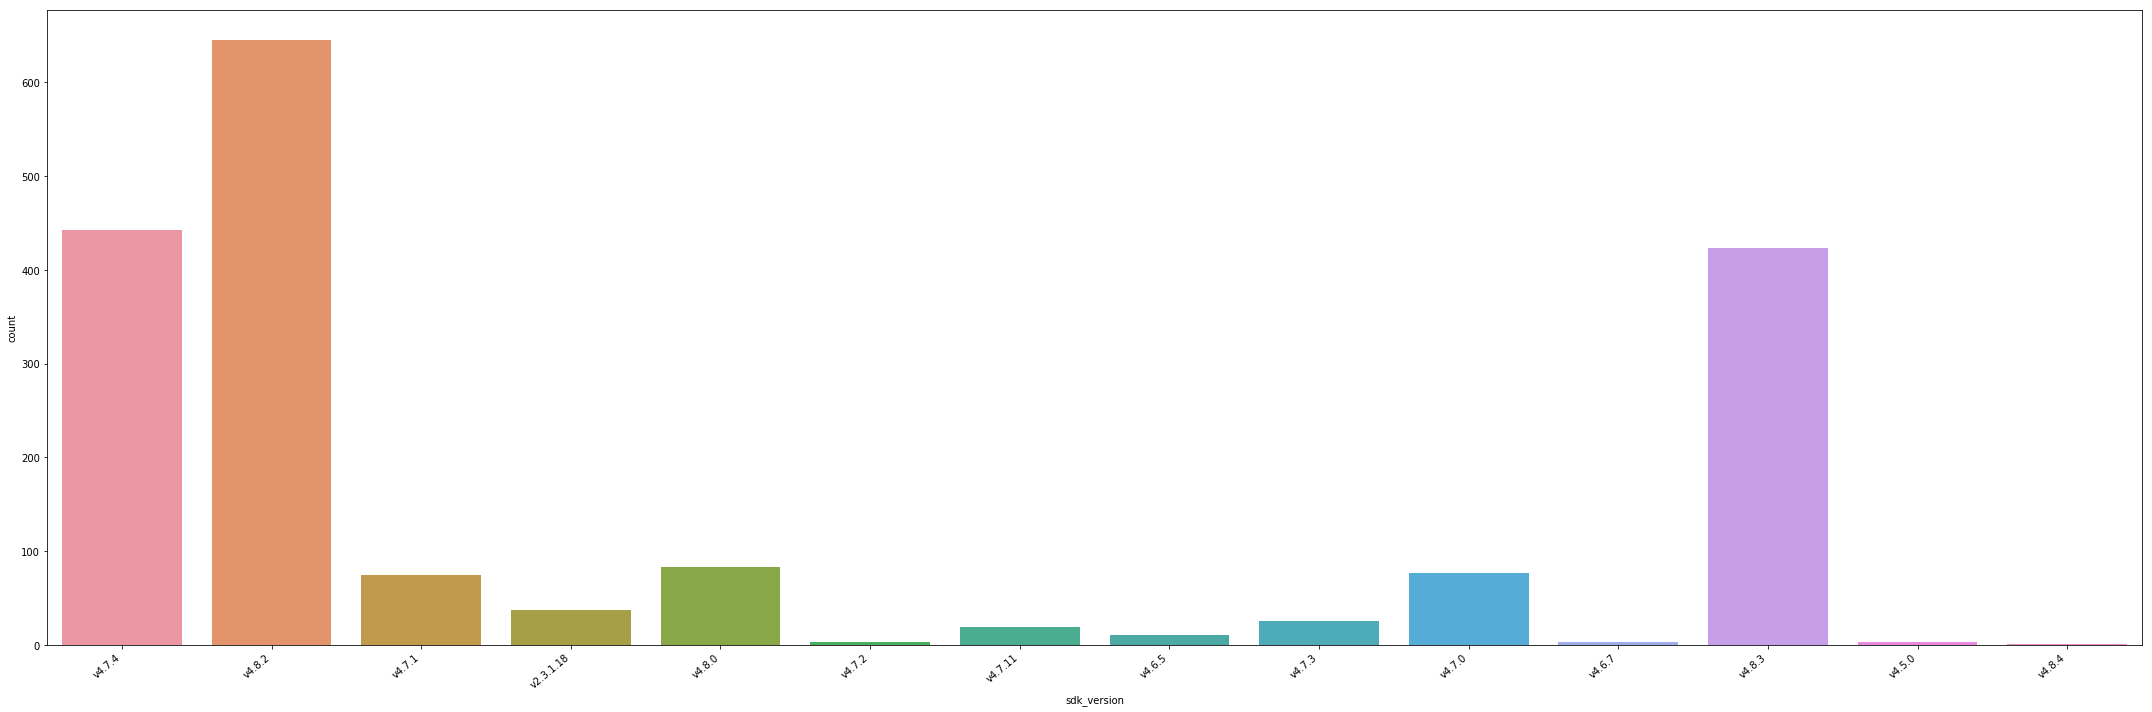

In [47]:
print(axag['sdk_version'].nunique())
plt.figure(num=None, figsize=(30,10))
ax = sns.countplot(axag['sdk_version'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

2


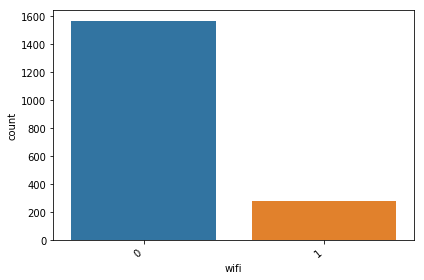

In [48]:
print(axag['wifi'].nunique())
plt.figure(num=None)#, figsize=(30,10))
ax = sns.countplot(axag['wifi'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Some general observations

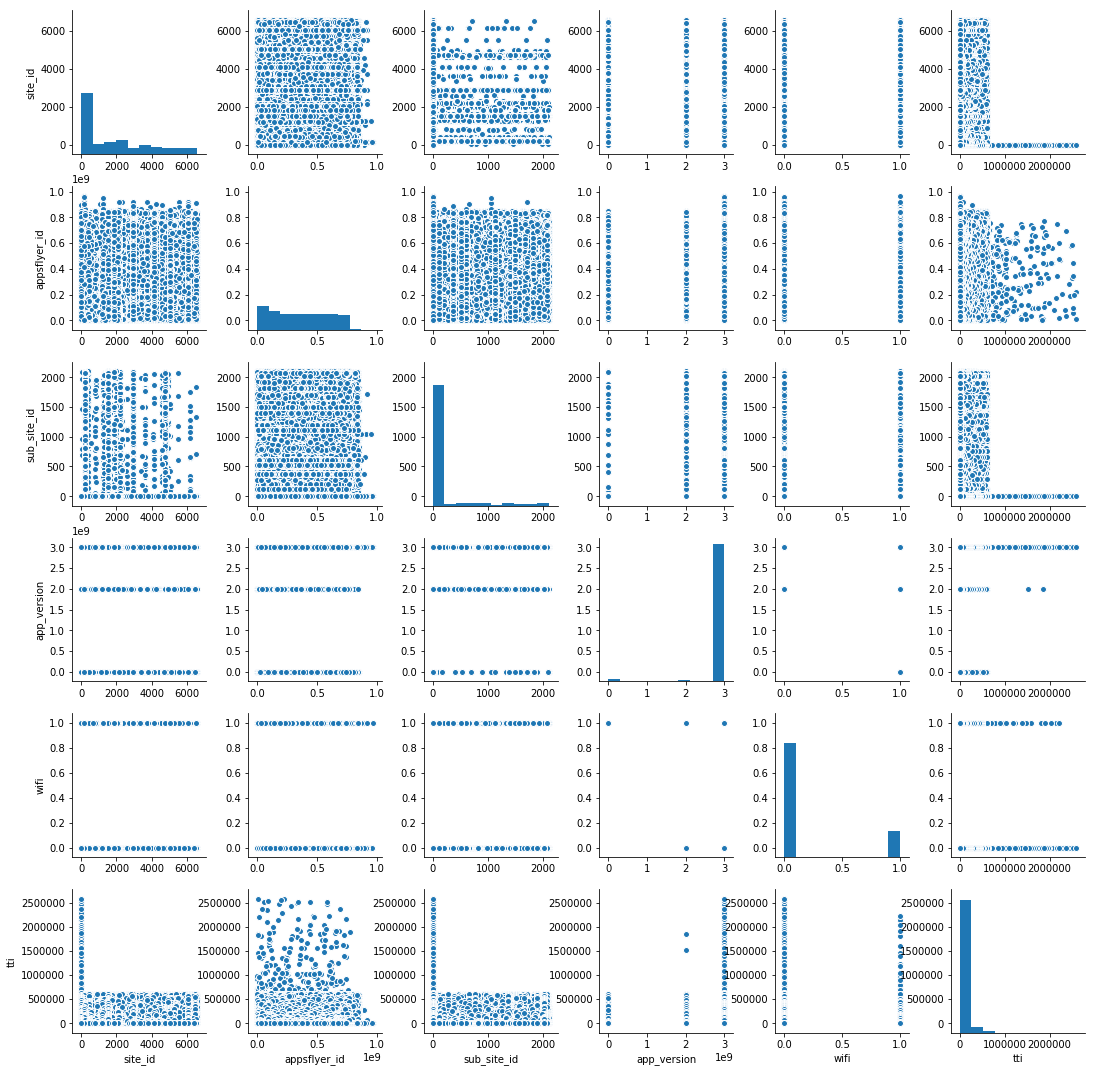

In [49]:
sns.pairplot(data)

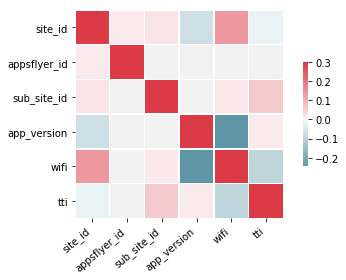

In [50]:
corr = data.corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Numeric vars are NOT highly correlated

### Analyze fraud reasons

5


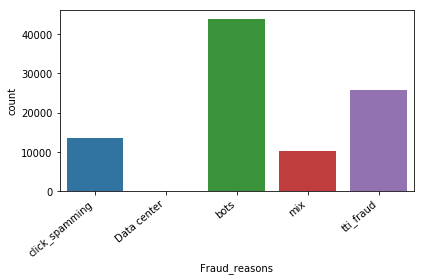

In [31]:
print(data['Fraud_reasons'].nunique())
plt.figure(num=None)#, figsize=(30,10))
ax = sns.countplot(data['Fraud_reasons'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

3


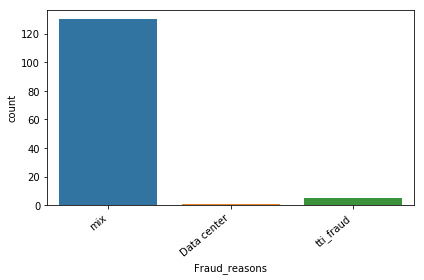

In [52]:
print(axag['Fraud_reasons'].nunique())
plt.figure(num=None)#, figsize=(30,10))
ax = sns.countplot(axag['Fraud_reasons'])#, order=data.device_type.value_counts().iloc[:50].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Even trusted sources have users, marked as fraud -> can we trust algorithm, that labels??

In [58]:
axag['Fraud_reasons'].count()/len(axag)#

0.073672806067172261

Algorithm says, there are 7% of fraud in these chanels, business logic says <1%

In [63]:
data['install_time_since_midnight_sec'] = (data['install_time'] - 
                                           pd.to_datetime(data['install_time'].dt.date)) / np.timedelta64(1, 's')

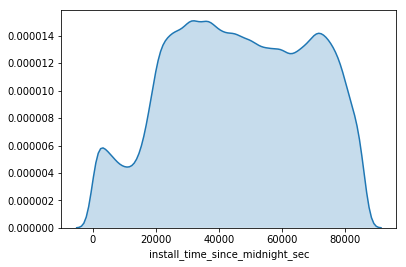

In [69]:
sns.distplot(data['install_time_since_midnight_sec'], hist=False, kde_kws={"shade": True})

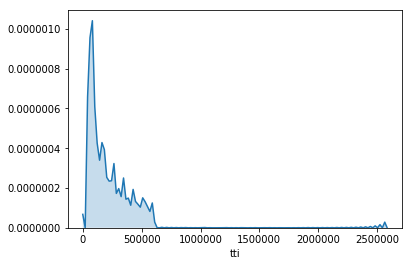

In [70]:
sns.distplot(data['tti'], hist=False, kde_kws={"shade": True})

countplotting, counting fraud 